# **ABSTRACT:**

Carbon dioxide (CO2) emissions wield considerable ramifications for the environment. The accumulation of CO2 in the atmosphere begets a greenhouse effect, fostering heat retention and thereby inducing global warming. This phenomenon results in a spectrum of adverse consequences, including elevated global temperatures, sea level escalation, shifts in weather patterns, and disruptions to ecosystems. The enduring repercussions of climate change pose a substantive threat to human health, agriculture, biodiversity, and socio-economic systems.

Consequently, the imperative to mitigate CO2 emissions assumes paramount importance. Such measures constitute a pivotal strategy in addressing climate change and attenuating its deleterious impact on the environment and human well-being

# **AIM:**

To Analyze the raw data collected from Kaggle and fit a linear, tree-based and auto ml models to compare the models interpretability with each other and interpret the SHAP Values.

# **VARIABLE DESCRIPTION:**

Make: The brand or manufacturer of the vehicle.

Model: The specific model or name of the vehicle.

Vehicle Class: The category or type of the vehicle, such as compact or SUV.

Engine Size (L): The size of the vehicle's engine, measured in liters.

Cylinders: The number of cylinders in the vehicle's engine.

Transmission: The type of transmission in the vehicle (e.g., AS5 for automatic, 5-speed).
Fuel Type: The type of fuel the vehicle uses.

Fuel Consumption City (L/100 km): The amount of fuel consumed per 100 kilometers during city driving.

Fuel Consumption Hwy (L/100 km): The amount of fuel consumed per 100 kilometers during highway driving.

Fuel Consumption Comb (L/100 km): The combined fuel consumption, representing a mix of city and highway driving.

Fuel Consumption Comb (mpg): The combined fuel consumption converted to miles per gallon (mpg).

CO2 Emissions (g/km): The amount of carbon dioxide emissions produced by the vehicle per kilometer traveled.This is the outcome variable to be predicted.

**Importing the required libraries**

In [ ]:
import pandas as pd
!pip install shap
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# **What is SHAP Analysis?**

SHAP (SHapley Additive exPlanations) analysis is a method for explaining the output of machine learning models. It provides a way to understand the contribution of each feature to the model's prediction for a specific instance.

In SHAP analysis, the idea is to break down the prediction of a machine learning model into individual contributions from each feature. These individual contributions are called SHAP values, and they represent the impact of each feature on the model's prediction compared to a baseline prediction (often the average prediction).

**SHAP values provide a clear understanding of how each feature contributes to the model's prediction for a particular instance**.

**Loading the dataset from GIT and dividing it into independant and target variable**

In [ ]:
# GitHub raw file URL
url = "https://raw.githubusercontent.com/vaishveerkumar/Data-Science/main/CO2%20Emissions.csv"

# Read CSV file into Pandas DataFrame
df = pd.read_csv(url)
df.drop(["Make","Model","Vehicle Class"],axis=1,inplace= True) #not significant features for the prediction of CO2 emissions.

In [ ]:
X = df.drop("CO2 Emissions(g/km)", axis=1)
y = df["CO2 Emissions(g/km)"]

In [ ]:
print(X)
print(y)

      Engine Size(L)  Cylinders Transmission Fuel Type  \
0                2.0          4          AS5         Z   
1                2.4          4           M6         Z   
2                1.5          4          AV7         Z   
3                3.5          6          AS6         Z   
4                3.5          6          AS6         Z   
...              ...        ...          ...       ...   
7380             2.0          4          AS8         Z   
7381             2.0          4          AS8         Z   
7382             2.0          4          AS8         Z   
7383             2.0          4          AS8         Z   
7384             2.0          4          AS8         Z   

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
0                                  9.9                              6.7   
1                                 11.2                              7.7   
2                                  6.0                              5.8   
3  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
catagorical_features = ['Transmission','Fuel Type']

# **Q1. Fit a linear model and interpret the regression coefficients**

Fitting a linear regression model to the dataset involves finding the line (in the case of simple linear regression) or the hyperplane (in the case of multiple linear regression) that best fits the relationship between the independent variables and the dependent variable.

**The model aims to minimize the difference between the observed values and the predicted values.**

**The regression coefficients represent the slopes of the linear relationship between each independent variable and the dependent variable.**

In [ ]:
#features that are not categorical
numerical_features = [c for c in X_train.columns if c not in catagorical_features]

#encodes categorical features into integer values.
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]

#to standardize the numerical features to have mean 0 and variance 1
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]

# apply different transformations to different columns of a DataFrame in a single step and give o/p as a dataframe
mapper = DataFrameMapper(num + cat, df_out=True)

preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)

reg_linear = sm.OLS(y_train, preprocessed_X_train).fit()

In [ ]:
df.head()

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add')
    y_pred = reg_linear.predict(X)
    return mean_absolute_error(y, y_pred)

MAE is straightforward to understand and interpret because it's directly in the same units as the target variable.It is more robust to outliers than MSE.

**Here we are less concerned about penalizing large errors more severely, and hence calculating MAE might be better and is done as below:-**

In [ ]:
linear_train_mae = evaluate(X_train, y_train, mapper, reg_linear, True)
linear_test_mae = evaluate(X_test, y_test, mapper, reg_linear, True)
print(f"train MAE = {round(linear_train_mae, 3)}, test MAE = {round(linear_test_mae, 3)} ")

train MAE = 11.577, test MAE = 9.786 


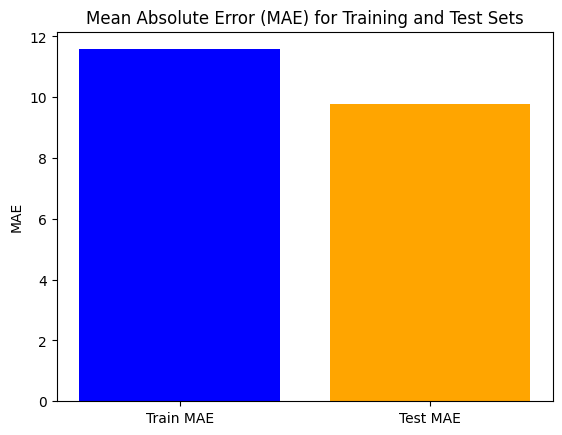

In [ ]:
labels = ['Train MAE', 'Test MAE']
values = [linear_train_mae, linear_test_mae]

plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Mean Absolute Error (MAE) for Training and Test Sets')
plt.ylabel('MAE')

plt.show()

# **Inference:**

*   The model seems to perform slightly better on the test set than on the training set based on the MAE values. This suggests that the model is generalizing well to unseen data.

*   Because the model's performance on the test data is better than on the training data overfitting is less likely to be a concern.

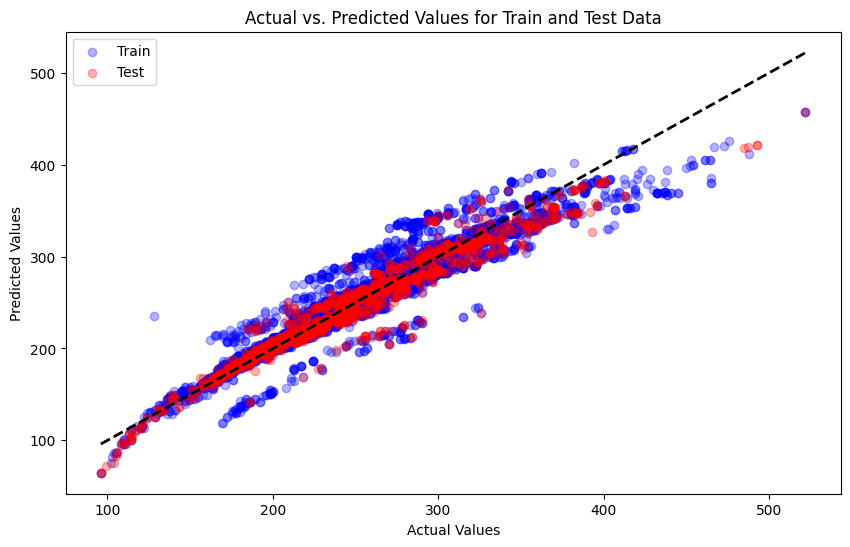

In [ ]:
# Generate predictions for both train and test data
train_preds = reg_linear.predict(sm.add_constant(mapper.transform(X_train), has_constant='add'))
test_preds = reg_linear.predict(sm.add_constant(mapper.transform(X_test), has_constant='add'))

plt.figure(figsize=(10, 6))

# Train data points
plt.scatter(y_train, train_preds, alpha=0.3, label='Train', color='blue')
# Test data points
plt.scatter(y_test, test_preds, alpha=0.3, label='Test', color='red')

# Reference line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.title('Actual vs. Predicted Values for Train and Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [ ]:
reg_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.907
Model:                             OLS   Adj. R-squared:                  0.907
Method:                  Least Squares   F-statistic:                     7163.
Date:                 Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                         23:40:01   Log-Likelihood:                -25396.
No. Observations:                 5908   AIC:                         5.081e+04
Df Residuals:                     5899   BIC:                         5.087e+04
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              226.8214      1.002    226.358      0.000     224.857     228.786
Engine Size(L)                       8.2901      0.690     12.007      0.000       6.937       9.644
Cylinders                            9.7314      0.661     14.716      0.000       8.435      11.028
Fuel Consumption City (L/100 km)    -5.9511     10.982     -0.542      0.588     -27.481      15.578
Fuel Consumption Hwy (L/100 km)      6.9061      5.820      1.187      0.235      -4.504      18.316
Fuel Consumption Comb (L/100 km)    19.8218     16.553      1.197      0.231     -12.628      52.272
Fuel Consumption Comb (mpg)        -20.1763      0.680    -29.691      0.000     -21.508     -18.844
Transmission                        -0.0537      0.035     -1.540      0.124      -0.122       0.015
Fuel Type                            7.7386      0.297     26.084      0.000       7.157       8.320
==============================================================================
Omnibus:                      631.251   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3326.828
Skew:                           0.380   Prob(JB):                         0.00
Kurtosis:                       6.597   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Inference**

This Ordinary Least Squares (OLS) regression output provides a wealth of information about the relationship between CO2 emissions (the dependent variable) and various predictors (independent variables).


*   The R-squared value is 0.907, and the adjusted R-squared is also 0.907, indicating that approximately 90.7% of the variance in CO2 emissions can be explained by the model's independent variables. **This suggests a strong fit**.

*   Engine Size (L) and Cylinders have positive coefficients, meaning that as these variables increase, CO2 emissions increase. **Their p-values are significantly low (p < 0.05), indicating these relationships are statistically significant.**

*  Fuel Consumption Comb (mpg) shows a strong negative relationship with CO2 emissions, **which is statistically significant (p < 0.05). This indicates that as fuel efficiency increases, CO2 emissions decrease.**

*    While the model demonstrates a strong ability to explain the variance in CO2 emissions we need to look out for potential multicollinearity and the assumptions of normality and homoscedasticity not being fully met.

# **Linear Regression Model SHAP Analysis**

**Fitting Linear Regression Model from scikit-learn**

- The Linear Model that we fit initially for the data is an OLS method and it is not compatible with the explainer method for SHAP analysis. So here below we will fit a linear regression model from scikit-learn and incorporate it into a pipeline with preprocessing steps that's directly compatible with SHAP Explainer methods.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

categorical_features = ['Transmission', 'Fuel Type']
numerical_features = [c for c in X_train.columns if c not in categorical_features]

#to avoid pipeline running into categories in the test set that it did not see during training set parameter handle_unknown='use_encoded_value', unknown_value=-1

cat = [([c], [SimpleImputer(strategy='constant', fill_value=0), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)]) for c in categorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]

mapper = DataFrameMapper(num + cat, df_out=True)

reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
    y_pred = reg.predict(X)
    return mean_absolute_error(y, y_pred)

train_mae = evaluate(X_train, y_train, mapper=mapper, reg=pipeline, transform=True)
test_mae = evaluate(X_test, y_test, mapper=mapper, reg=pipeline, transform=True)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)}")

train MAE = 85.08, test MAE = 85.007


ExactExplainer explainer: 1478it [03:34,  6.72it/s]


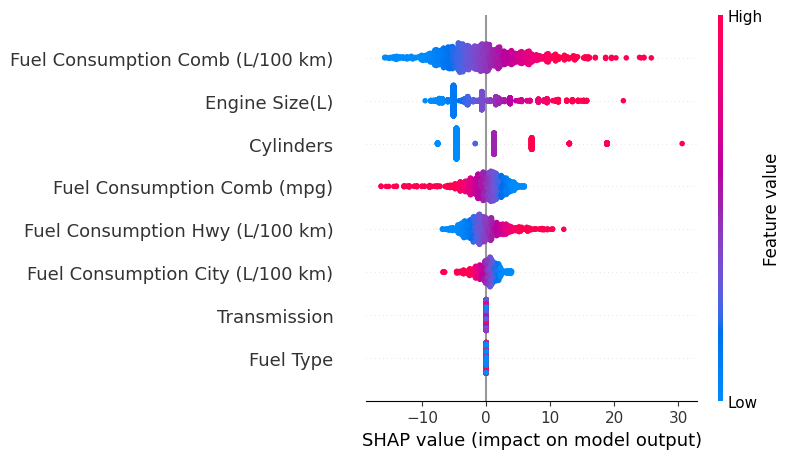

In [ ]:
# SHAP Explanation
def pipeline_predict(data):
    return pipeline.predict(data)

# Background dataset for SHAP explanations
X_train_transformed = mapper.transform(X_train)
background = shap.utils.sample(X_train_transformed, 100)  # Use 100 instances for background

# SHAP explainer
explainer = shap.Explainer(pipeline_predict, background)

# SHAP values for the test set
X_test_transformed = mapper.transform(X_test)
shap_values = explainer(X_test_transformed)

#plotting impact of each feature on the model output for all instances
shap.summary_plot(shap_values, X_test_transformed)


**Inference**

- The features at the top of the y-axis are the ones that have the highest impact on the model output across the dataset.

- High feature values are represented by red or pink colors.
- Low feature values are represented by blue colors.

- Fuel Consumption Comb (L/100 km): Mostly this feature has negative SHAP values and can indicate that as fuel consumption combined increases the value of predicted outcome decreases. **This feature appears to be the most impactful in reducing the model's prediction.**

- Engine Size (L): This has both positive and negative SHAP values. This indicates that a larger engine size increases the model's prediction and for some it decreases the prediction.

- Cylinders: Just like engine size this also shows that it can either increase or decrease the prediction, depending on the instance.

- Fuel Consumption Comb (mpg): The value suggests that as the fuel consumption comb (mpg) increases, **the model predicts a lower value for the target variable, that is it is inversely related to CO2 emissions.**

- Fuel Consumption Hwy (L/100 km) and Fuel Consumption City (L/100 km): Both features have a spread of SHAP values across negative and positive impacts, indicating a complex relationship where the impact of highway and city fuel consumption on the model's prediction changes depending on other factors.

- Transmission and Fuel Type: These feature has a cluster of points around zero, with both negative and positive SHAP values. It has smaller magnitude of impact compared to other features.

**Finding and Plotting the coefficients from Linear Regression Model**

- The coefficients from a linear regression model indicate how much the dependent variable -CO2 Emissions is expected to change with a one-unit increase in each predictor variable, holding all other variables constant

Regression coefficients:
Engine Size(L): 8.290137098103132
Cylinders: 9.7313851124148
Fuel Consumption City (L/100 km): -5.951132155966424
Fuel Consumption Hwy (L/100 km): 6.906126584298017
Fuel Consumption Comb (L/100 km): 19.821813236314295
Fuel Consumption Comb (mpg): -20.176252708799346
Transmission: -0.05370521101530734
Fuel Type: 7.738556728683502


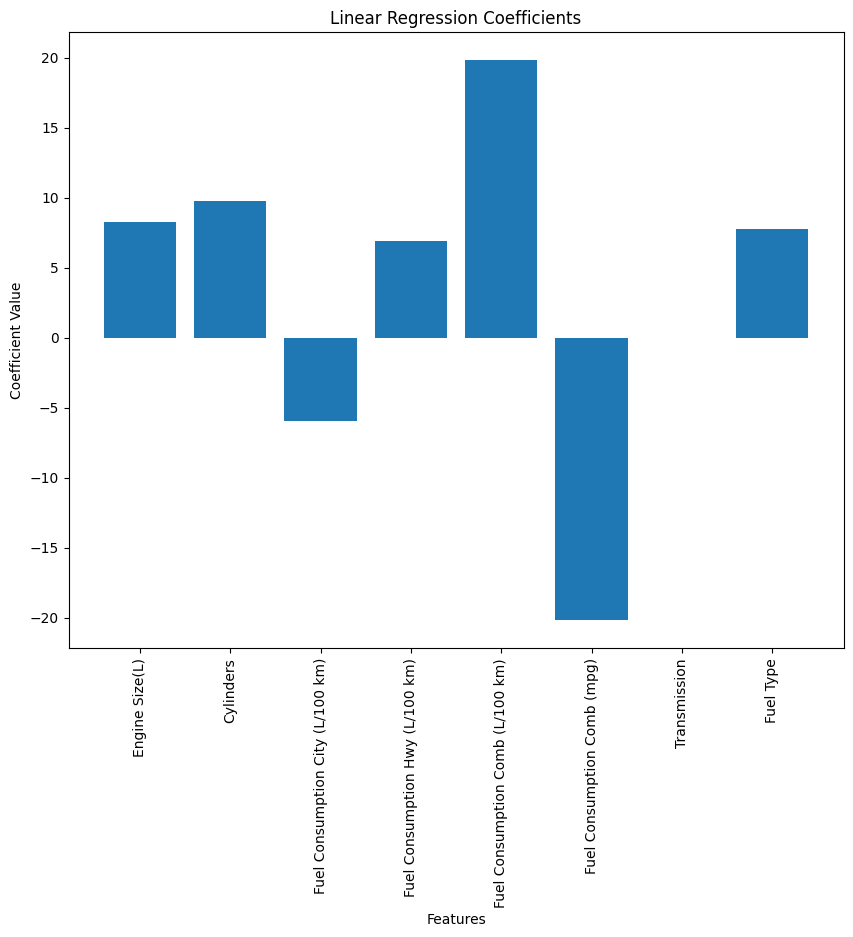

In [ ]:
# regression coefficients from the pipeline
coefficients = p.named_steps['reg'].coef_
transformed_feature_names = mapper.transformed_names_

print("Regression coefficients:")
for name, coef in zip(transformed_feature_names, coefficients):
    print(f"{name}: {coef}")

plt.figure(figsize=(10, 8))
plt.bar(transformed_feature_names, coefficients)
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.show()

**Inference**

- Engine Size(L): A positive coefficient 8.290 means, as the engine size increases by one liter, the target variable is expected to increase by around 8.29 units, holding all other features constant.

- Cylinders: The positive coefficient 9.73 for the number of cylinders indicates that each additional cylinder causes an increase of about 9.73 units in the target variable, holding all other features constant.

- Fuel Consumption City (L/100 km): The negative coefficient -5.95 suggests that for each additional liter per 100 kilometers consumed in the city, the target variable is expected to decrease by around 5.95 units.

- Fuel Consumption Hwy (L/100 km): The positive coefficient 6.91 for highway fuel consumption suggests that an increase in fuel consumption by one liter per 100 kilometers on the highway is associated with an increase of about 6.91 units in the target variable.

- Fuel Consumption Comb (L/100 km): **This feature has a significant positive coefficient 19.28**, indicating a strong positive effect on the target variable with an increase in combined fuel consumption.

- Fuel Consumption Comb (mpg): The large negative coefficient -20.18 for combined fuel efficiency in miles per gallon suggests that **higher fuel efficiency is connected with a decrease in the target variable**.

- Transmission: A small negative coefficient indicates that this categorical feature have a relatively minor impact on the target variable.

- Fuel Type: A positive coefficient 7.74 suggests that different types of fuel are associated with an increase in the target variable

**Partial Dependence Plot -Linear Model**

PDPs help to visualize the relationship between a feature and the predicted outcome, averaging out the effects of all other features. A PDP can tell you how changes in a feature's value will, on average, impact the model's predictions.

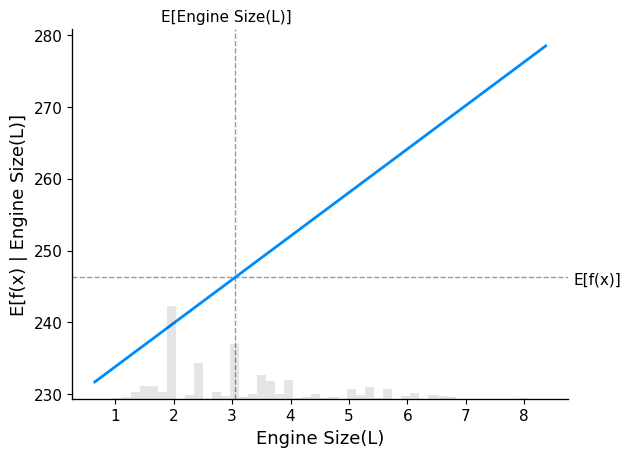

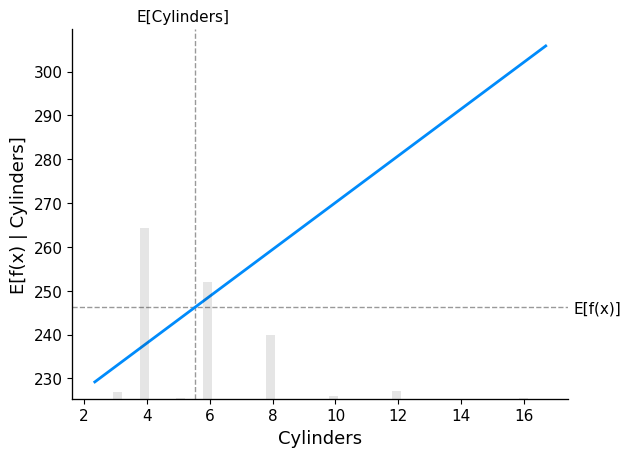

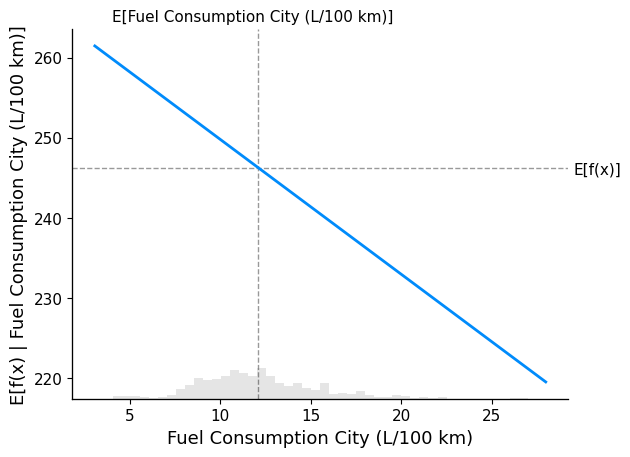

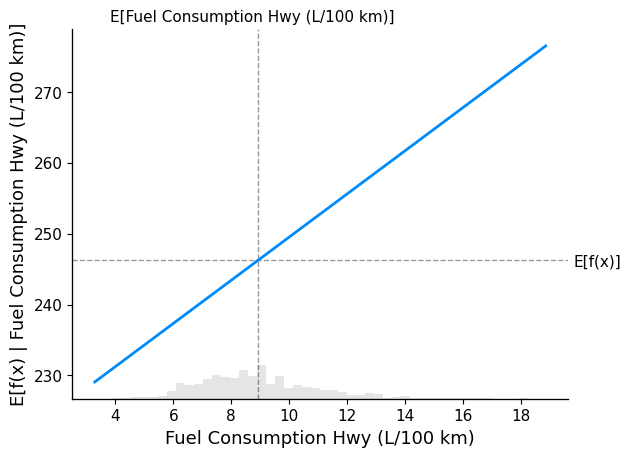

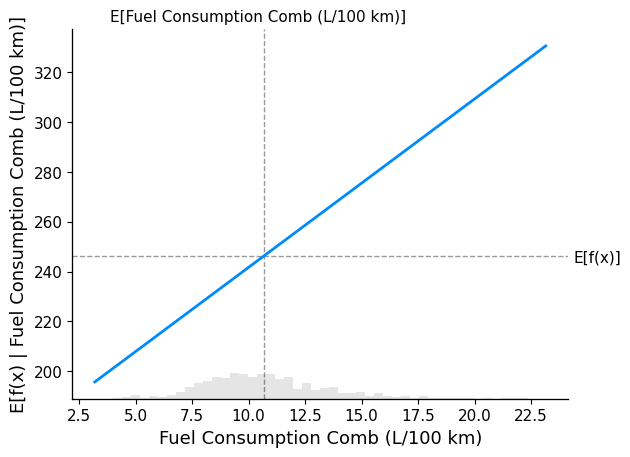

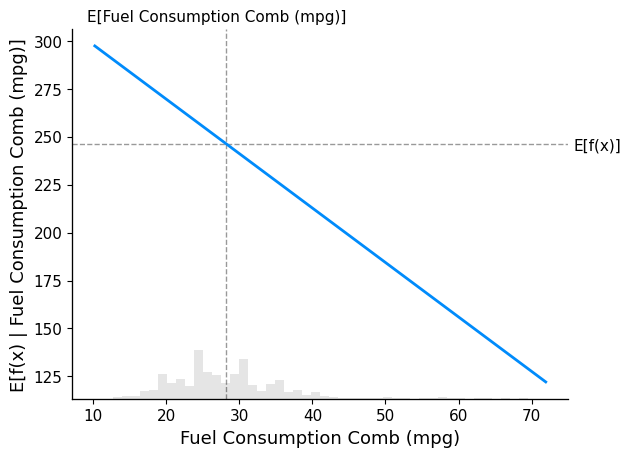

In [ ]:
def partial_dependence_plot(feature):
            shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_test,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)

for feature in numerical_features:
    partial_dependence_plot(feature)
    plt.show()


**Inference**

- Engine Size (L): The PDP shows a positive relationship between engine size and the target variable. As engine size increases, the model's predicted value also increases.Larger engines are associated with higher values of CO2 emissions.

- Cylinders: The PDP indicates a positive relationship between the number of cylinders and the target variable. More cylinders are associated with higher CO2 emissions.

- Fuel Consumption City (L/100 km): The plot shows an inverse relationship. As the fuel consumption in the city increases, the predicted value decreases.

- Fuel Consumption Hwy (L/100 km): The plot shows as highway fuel consumption increases, the predicted value also increases.

- Fuel Consumption Comb (L/100 km): The PDP shows a strong positive relationship indicating that combined fuel consumption is associated with higher predicted values of the target variable.

- Fuel Consumption Comb (mpg): As the combined fuel efficiency in miles per gallon increases, the predicted value decreases which means inversely related to CO2 emissions.

# **Q2. Fit a tree-based model and interpret the nodes**

# **Decision Tree**

A decision tree model is uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.

It's called a "tree" because the model starts with a single node, then branches off into possible outcomes or decisions, each of which may lead to additional nodes and branches.

The end of a branch that does not split any further is called a leaf, and it represents a classification or decision.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Define preprocessing steps for numerical and categorical features
catagorical_features = ['Transmission', 'Fuel Type']
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]

# to ensure that the feature names remain consistent between fitting and prediction input_df=true
mapper = DataFrameMapper(num + cat, df_out=True, input_df=True)

reg_tree = DecisionTreeRegressor()

# Define the pipeline including preprocessing and DecisionTree
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg_tree)
])
p = pipeline.fit(X_train, y_train)

def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
    y_pred = reg_tree.predict(X)
    return mean_absolute_error(y, y_pred)

train_mae = evaluate(X_train, y_train, mapper=mapper, reg=pipeline, transform=True)
test_mae = evaluate(X_test, y_test, mapper=mapper, reg=pipeline, transform=True)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)}")


train MAE = 0.518, test MAE = 1.327


**Inference**

*   The MAE for the training dataset is lower than that for the test dataset.

*   The difference in MAE between the training and test sets suggest that the model is well-fitted but is starting to overfit to the training data, as indicated by its poorer performance on the test data.
*   The substantial difference between training and test MAE suggests that the decision tree model might be overfitting the training data
*  The model's ability to generalize from the training data to unseen data is not strong





**Feature Importance from Decision Tree Model**

<BarContainer object of 8 artists>

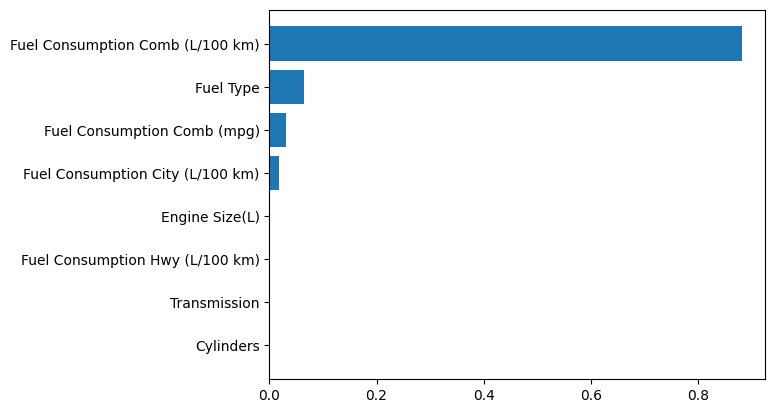

In [ ]:
sorted_idx = reg_tree.feature_importances_.argsort()
features = numerical_features + catagorical_features
result = sorted(zip(features, reg_tree.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

**Inference**

- The top features that have the most significant impact are:

 Fuel Consumption Comb (L/100 km) and Fuel Consumption Comb(mpg): This is the combined fuel consumption and suggests it is a critical predictor in the model, predicting vehicle CO2 emissions

- Features like Transmission,Cylinders have much lower importance scores, indicating they have less influence on the model's predictions.

**Plotting first decision tree and confining it to 3 level from root down**

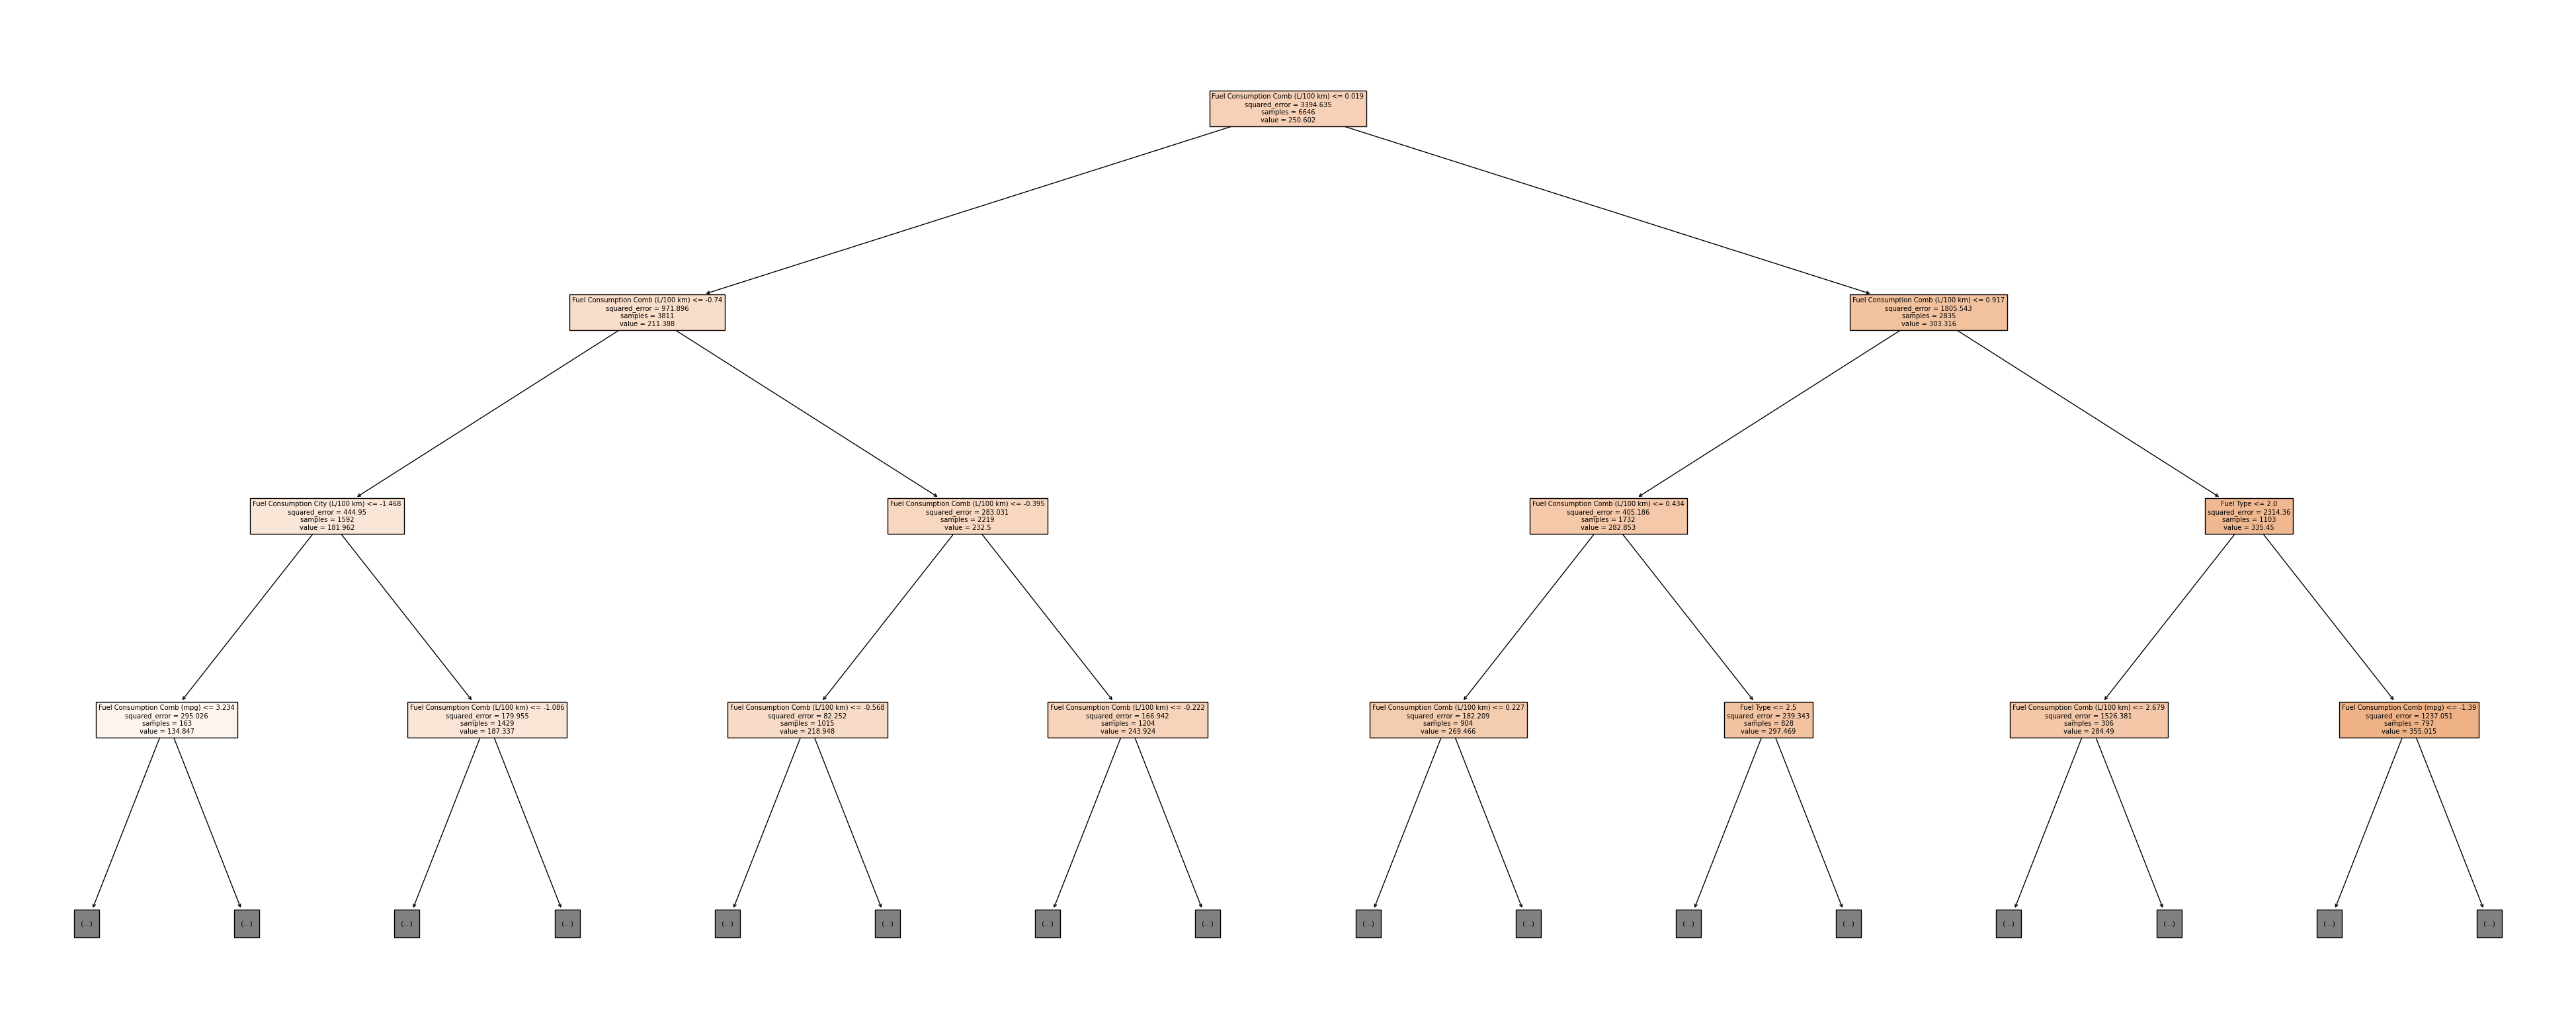

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 20))
plot_tree(reg_tree, feature_names=numerical_features + catagorical_features, filled=True, max_depth=3)
plt.show()

# **Decision Tree Model SHAP Analysis**

In [ ]:
explainer = shap.TreeExplainer(reg_tree)

# Transform the dataset with preprocessing pipeline
X_test_transformed = mapper.transform(X_test)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_transformed)

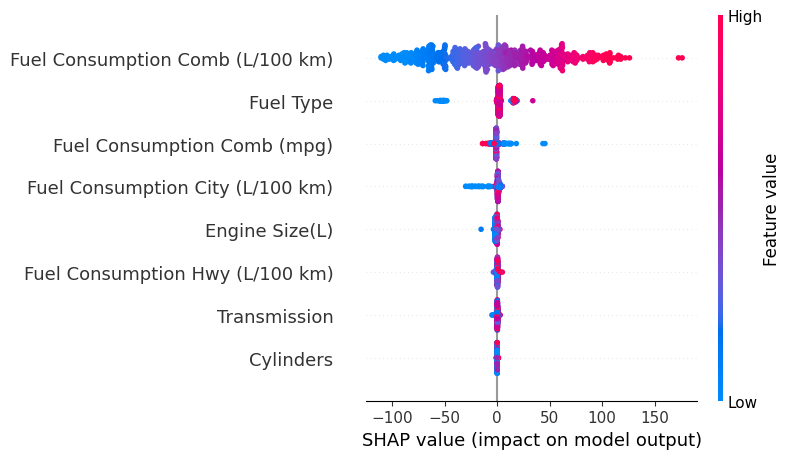

In [ ]:
# SHAP Summary Plot for all instances
shap.summary_plot(shap_values, X_test_transformed, plot_type="dot")


**Inference**

- Fuel Consumption Comb (L/100 km) has the highest variation in SHAP values. This means that higher values of this feature significantly increase the prediction, while lower values decrease it.

- Fuel Consumption Comb (mpg) There's a clear trend where higher miles per gallon indicating higher fuel efficiency tend to decrease the model's output value, as seen by the SHAP values marked as blue extending to the right

- Fuel Consumption City (L/100 km) has a mostly negative SHAP values, showing it influences the prediction in negative direction.

- Engine Size(L) , Fuel Consumption Hwy (L/100 km)and Transmission and Cylinders appear to have less impact on the model's output, as their SHAP values are closer to zero

**Partial Dependence Plot**

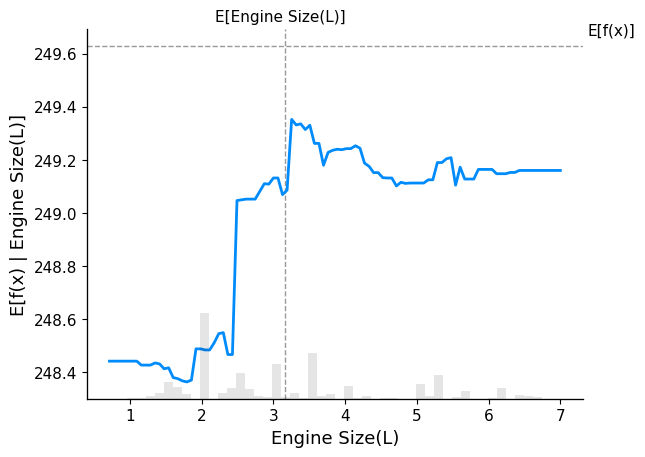

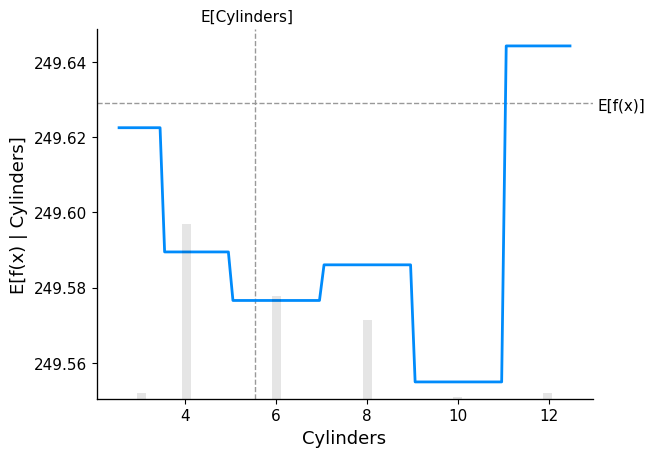

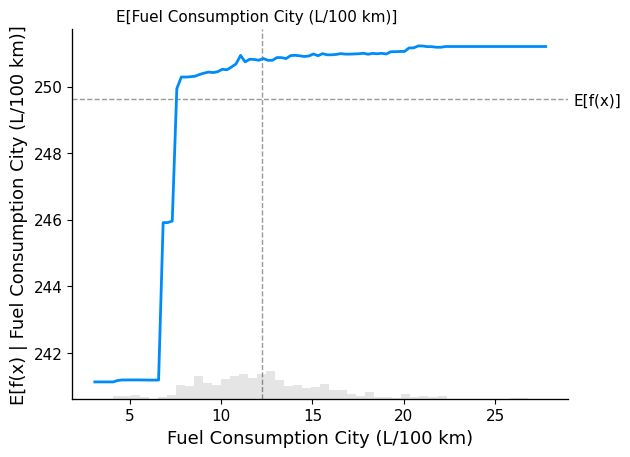

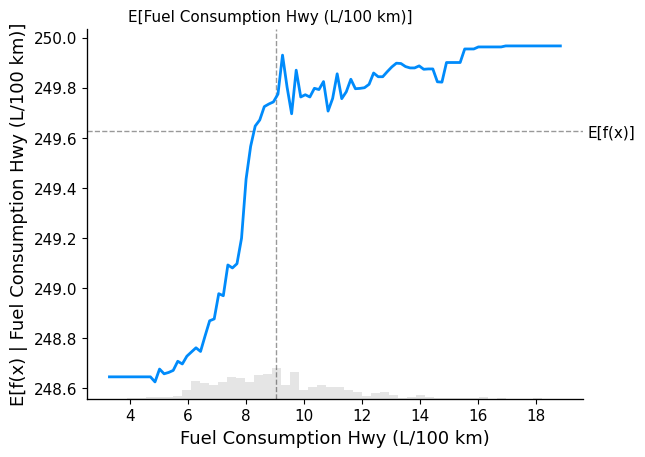

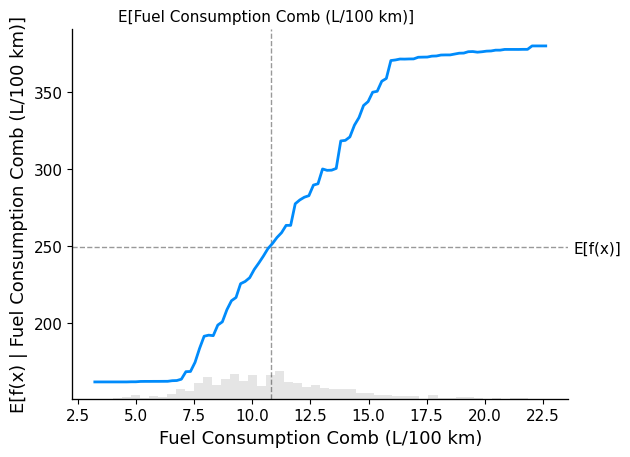

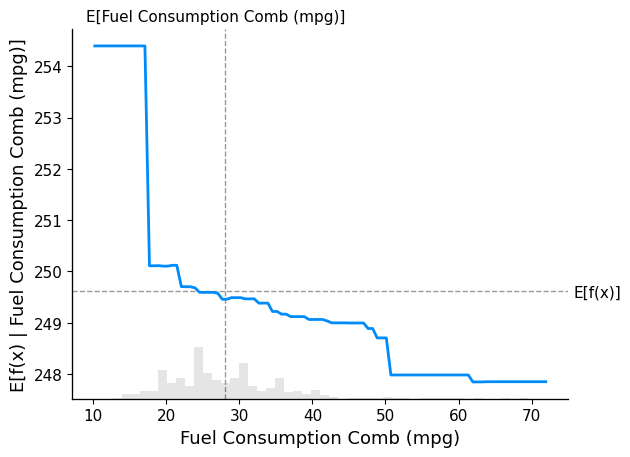

In [ ]:
def partial_dependence_plot(feature):
            shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_test,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)

for feature in numerical_features:
    partial_dependence_plot(feature)
    plt.show()


**Inference**

- Engine Size (L): The PDP indicates that there's a sharp increase in the predicted outcome up to a certain point after which it flattens . This suggests that after a threshold further increases do not change the prediction.

- Cylinders: The plot shows a step-like pattern, which is characteristic of a discrete feature. As the number of cylinders increases, the predicted outcome decreases and then takes a sharp increase, but this relationship appears to flatten after a certain number of cylinders.

- Fuel Consumption City (L/100 km): The prediction increases steadily as the fuel consumption in the city increases. This suggests a strong positive linear relationship between city fuel consumption and the predicted outcome.

- Fuel Consumption Hwy (L/100 km): Highway fuel consumption shows a positive relationship with the predicted outcome, indicating that higher highway fuel consumption leads to higher predicted values.

- Fuel Consumption Comb (L/100 km): The combined fuel consumption also shows a strong positive relationship with the predicted outcome.

- Fuel Consumption Comb (mpg): **This plot shows an inverse relationship**, where the predicted outcome decreases sharply as the combined fuel efficiency (mpg) increases initially, then the effect seems to flatten out.

# **Q3. Use auto ml to find the best model**

In [ ]:
# GitHub raw file URL
url = "https://raw.githubusercontent.com/vaishveerkumar/Data-Science/main/CO2%20Emissions.csv"
df_pd = pd.read_csv(url)

# Convert Pandas DataFrame to H2OFrame
df = h2o.H2OFrame(df_pd)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
pct_rows = 0.80
df_train, df_test = df.split_frame([pct_rows])

print(df_train.shape)
print(df_test.shape)

(5912, 12)
(1473, 12)


In [ ]:
X=df.columns
print(X)

#Separting dependant variable from independant

y = "CO2 Emissions(g/km)"
X.remove(y)
print(X)

['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']


# **H20 AutoML Execution**

When aml.train(x=X, y=y, training_frame=df_train) is done- we instruct the AutoML object (aml) to train a set of machine learning models using the features in X to predict the target variable y, using the data provided in the df_train DataFrame.

H2O's AutoML algorithm will automatically try various machine learning models, tune hyperparameters and select the best-performing model based on some predefined performance metric using cross-validation on the provided training data. Once the training is complete, we can access the best model and its performance metrics to make predictions on new data.

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML
aml.train(x=X, y=y, training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/12
# GBM base models (used / total),1/5
# XGBoost base models (used / total),2/3
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance which is the average discrepancy between the observed response values and the response values predicted by the model.

model_id                                                   rmse      mse      mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_2_20240318_15610     3.2029   10.2586  2.02723  0.0131667                   10.2586
StackedEnsemble_BestOfFamily_3_AutoML_2_20240318_15610  3.20454  10.2691  2.02849  0.0131741                   10.2691
GBM_5_AutoML_2_20240318_15610                           3.24642  10.5393  2.05007  0.0133372                   10.5393
StackedEnsemble_AllModels_1_AutoML_2_20240318_15610     3.34553  11.1925  2.06651  0.0135316                   11.1925
StackedEnsemble_BestOfFamily_2_AutoML_2_20240318_15610  3.34778  11.2077  2.06834  0.0135404                   11.2077
XGBoost_2_AutoML_2_20240318_15610                       3.38495  11.4579  2.09034  0.0136571                   11.4579
StackedEnsemble_BestOfFamily_1_AutoML_2_20240318_15610  3.46666  12.0177  2.0044   0.0137766                   12.0177
GBM_4_AutoML_2_20240318_15610                   

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

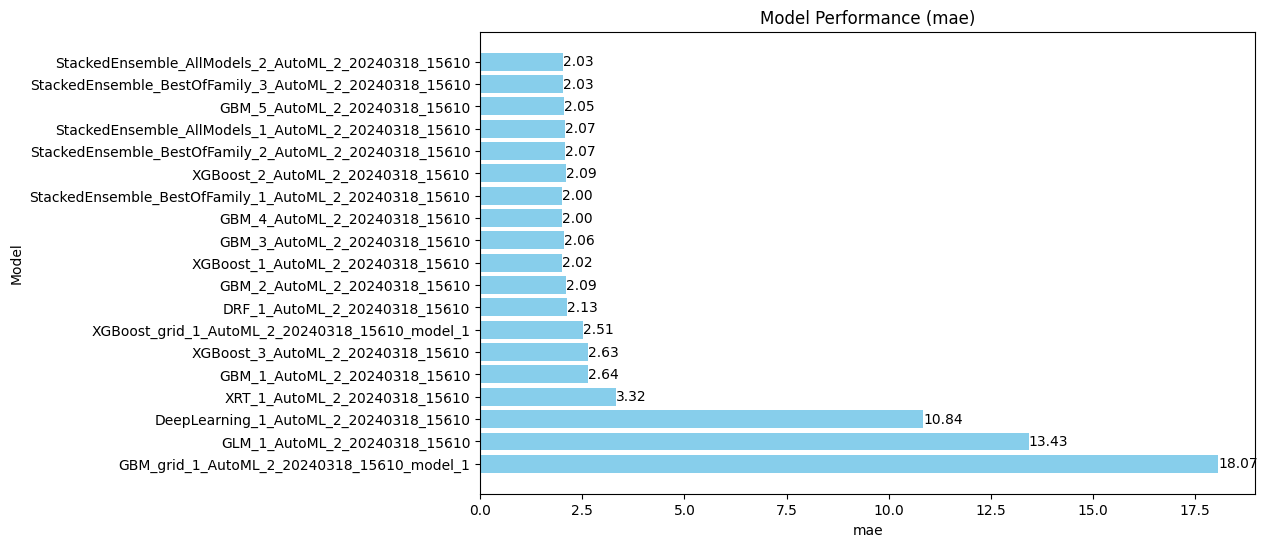

In [ ]:
bestmodel = aml.leaderboard
print (bestmodel)

# Getting the model names and mean_residual_deviance values from the leaderboard
model_names = aml.leaderboard['model_id'].as_data_frame().values.flatten()
mean_residual_deviance = aml.leaderboard['mae'].as_data_frame().values.flatten().astype(float)

# Plotting the leaderboard
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, mean_residual_deviance, color='skyblue')

# Adding labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)

plt.xlabel('mae')
plt.ylabel('Model')
plt.title('Model Performance (mae)')

 # to get highest-performing model at the top
plt.gca().invert_yaxis()
plt.show()

**Visualization of the Training and CV metrics**

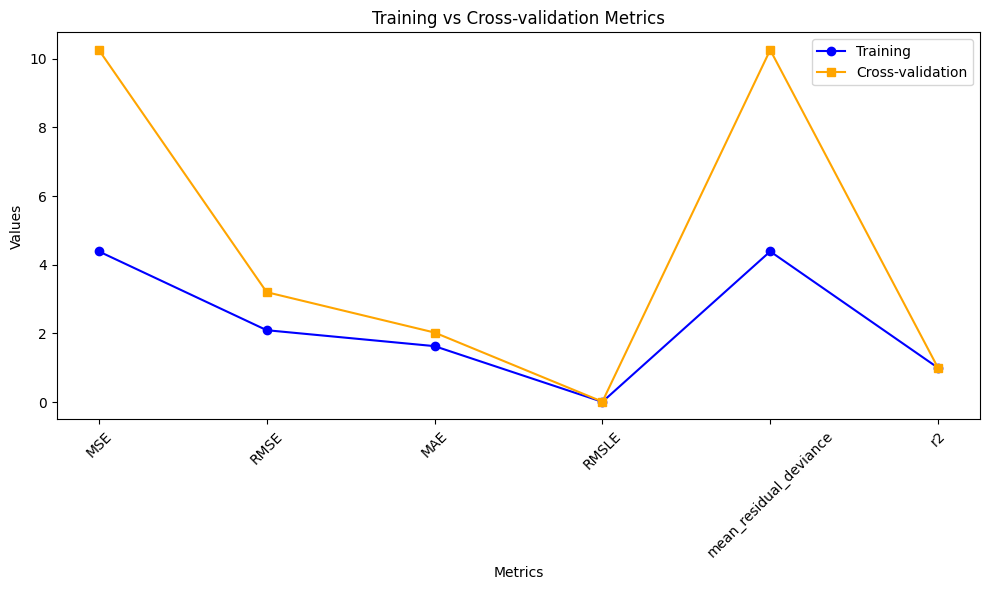

In [ ]:
# Getting the best model
best_model = aml.leader

# training performance metrics
train_perf = best_model.model_performance(train=True)

# cross-validation performance metrics
cv_perf = best_model.model_performance(xval=True)

metrics = ['MSE', 'RMSE', 'MAE', 'RMSLE', 'mean_residual_deviance', 'r2']

train_values = [train_perf.mse(), train_perf.rmse(), train_perf.mae(), train_perf.rmsle(), train_perf.mean_residual_deviance(), train_perf.r2()]
cv_values = [cv_perf.mse(), cv_perf.rmse(), cv_perf.mae(), cv_perf.rmsle(), cv_perf.mean_residual_deviance(), cv_perf.r2()]

positions = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.plot(positions, train_values, marker='o', label='Training', color='blue')
plt.plot(positions, cv_values, marker='s', label='Cross-validation', color='orange')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Training vs Cross-validation Metrics')
plt.legend()
plt.xticks(positions, metrics, rotation=45)
plt.tight_layout()
plt.show()


**Inference from Model metrics and Graph**

The data has been divided into 5 folds and the model is trained and evaluated 5 times, each time using a different fold as the validation set and the remaining folds as the training set.

This allows us to assess the variability of the model's performance across different validation sets and provides a more robust estimate of the model's generalization performance compared to using a single train-test split.

MSE (Mean Squared Error):

The increase in MSE from training to CV suggests that the model fits the training data slightly better than it generalizes to unseen data.

RMSE (Root Mean Squared Error):

The RMSE is higher in CV indicating a loss in accuracy on unseen data.

MAE (Mean Absolute Error):

Again the MAE increases slightly in CV showing that the model's average absolute error is slightly higher on unseen data.

**The values for each metric on the cross-validation data indicate of potential overfitting, that is the model performs marginally better on the training data than on the CV data.**

# **H20 Model SHAP Analysis**

- First, we need to create a background dataset for the SHAP summary plot. In H2O, this is usually a sample of the training data which the model will use as a reference to compute the average effects of features.


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_2_20240318_15610,2.79369,7.80469,1.95129,0.0110945,7.80469,1295,0.302417,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20240318_15610,2.79513,7.81274,1.89756,0.0107907,7.81274,1313,0.175543,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20240318_15610,2.79569,7.81589,1.95287,0.0111026,7.81589,533,0.066777,StackedEnsemble
GBM_4_AutoML_2_20240318_15610,2.80257,7.8544,1.84264,0.0110365,7.8544,2522,0.040752,GBM
XGBoost_1_AutoML_2_20240318_15610,2.81771,7.93948,1.90192,0.0108653,7.93948,2696,0.025584,XGBoost
XGBoost_2_AutoML_2_20240318_15610,2.81899,7.94669,1.96162,0.0111993,7.94669,1882,0.013074,XGBoost
StackedEnsemble_AllModels_2_AutoML_2_20240318_15610,2.82249,7.96645,2.03285,0.0109297,7.96645,448,0.0402,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_2_20240318_15610,2.82386,7.97419,2.03383,0.0109346,7.97419,583,0.02437,StackedEnsemble
GBM_5_AutoML_2_20240318_15610,2.86944,8.23369,2.06394,0.011106,8.23369,810,0.015345,GBM
GBM_3_AutoML_2_20240318_15610,2.87079,8.24143,1.93133,0.0113116,8.24143,1961,0.041864,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

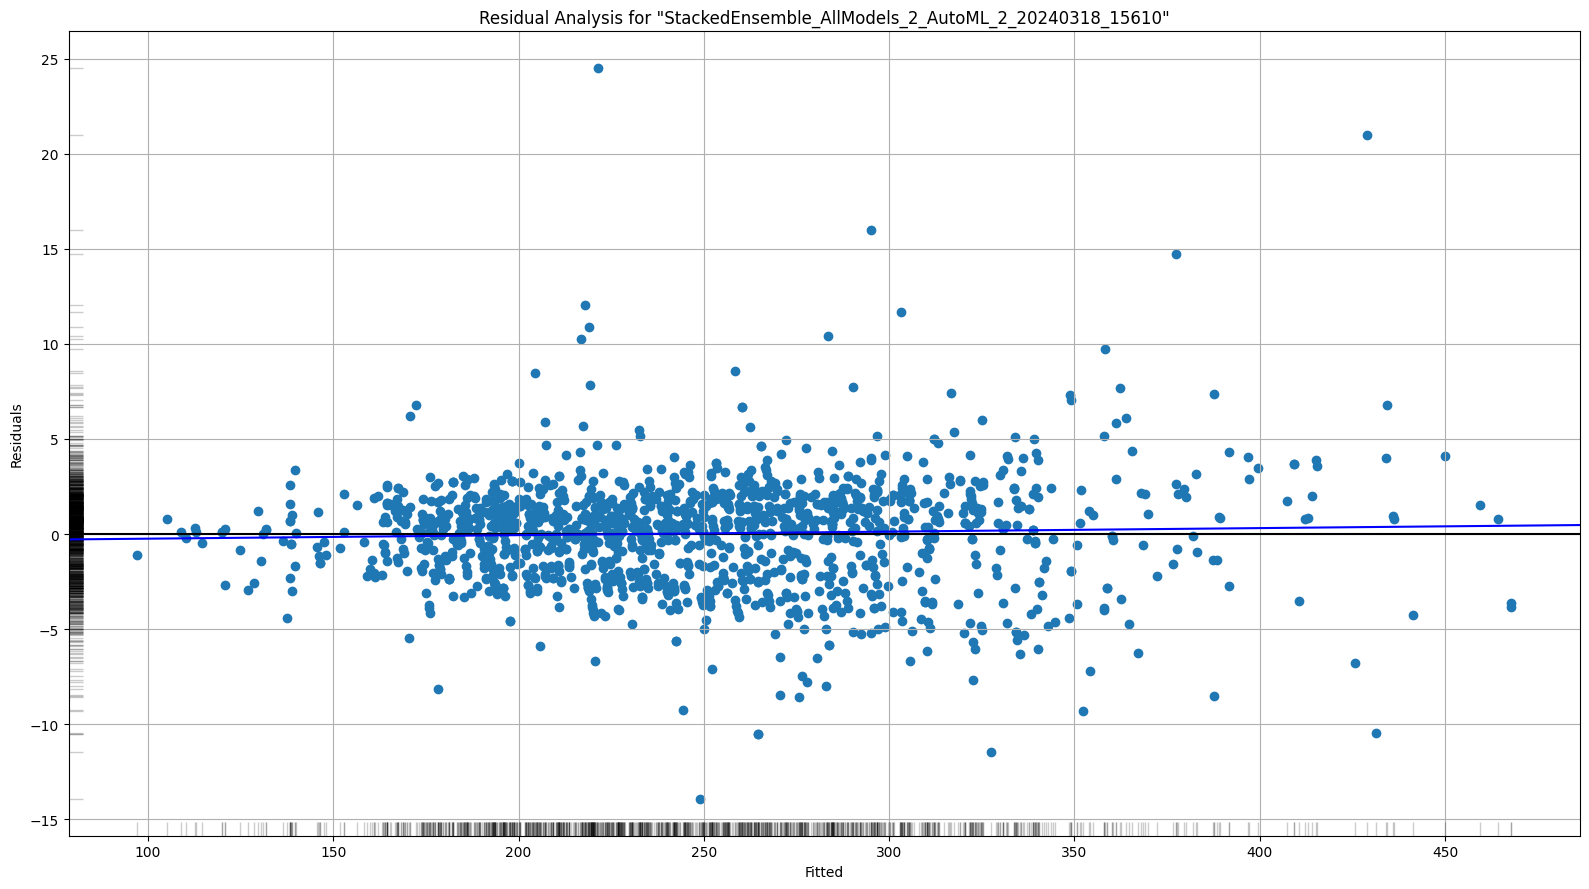

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

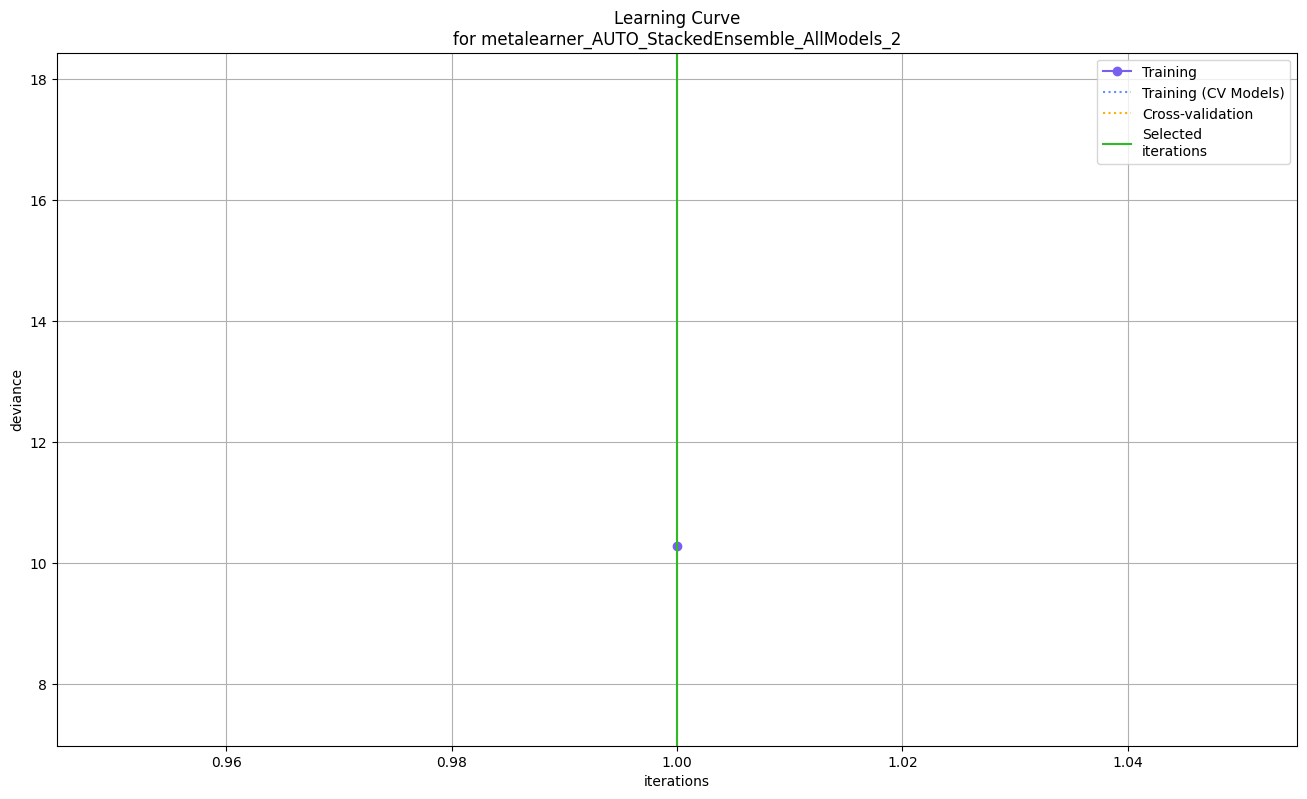

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

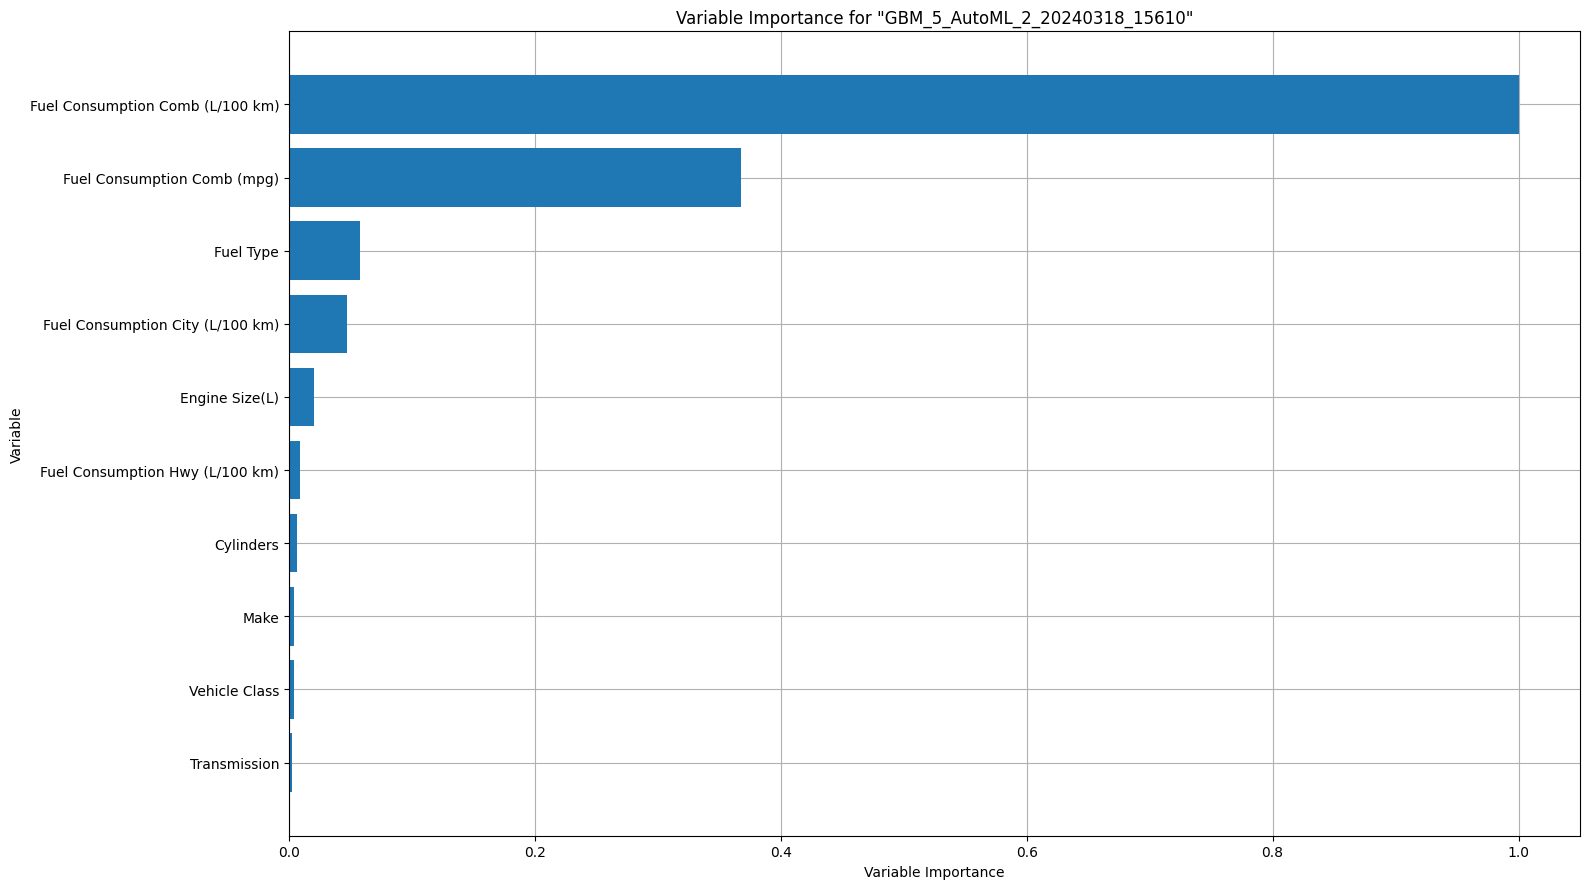

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

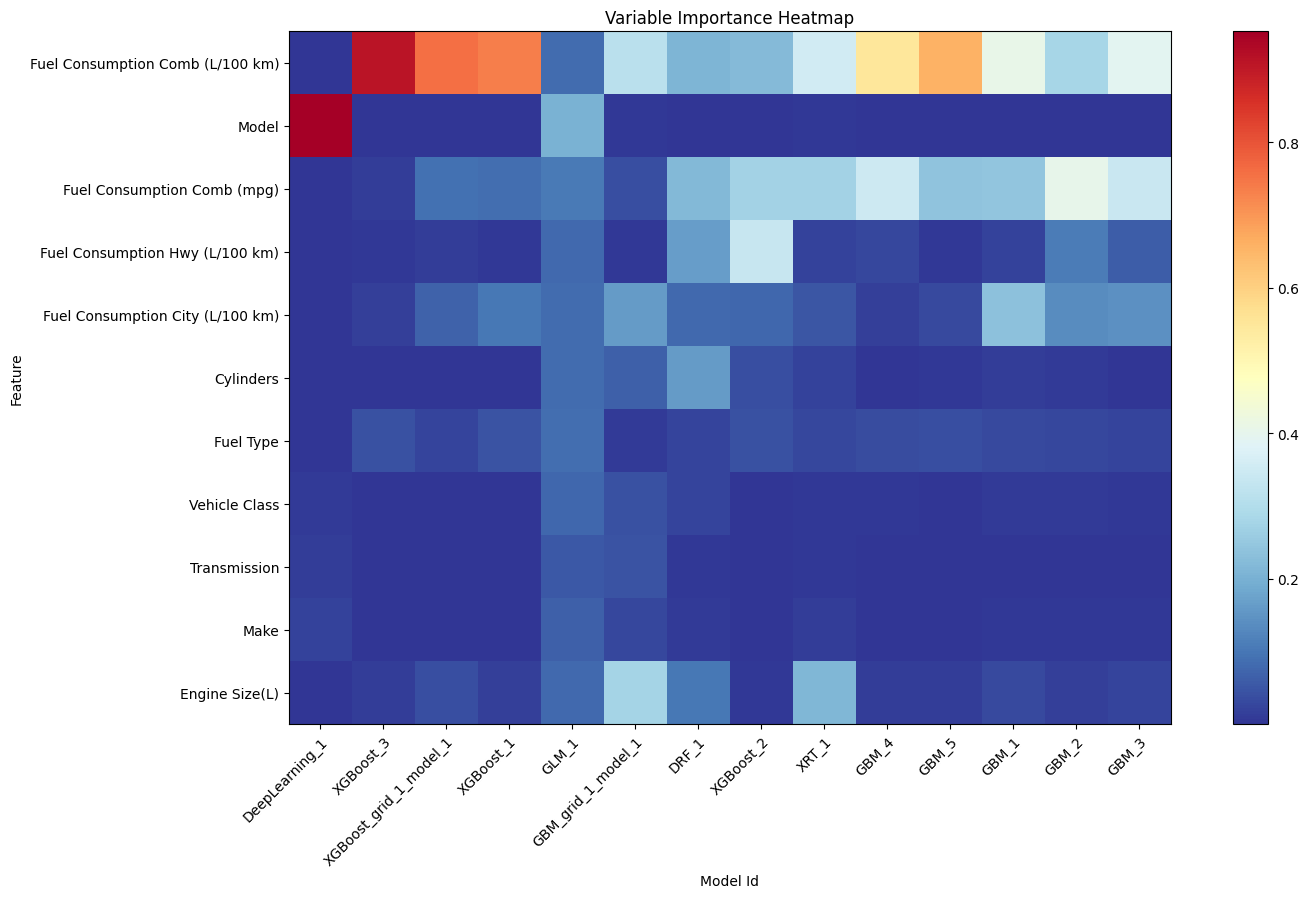

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

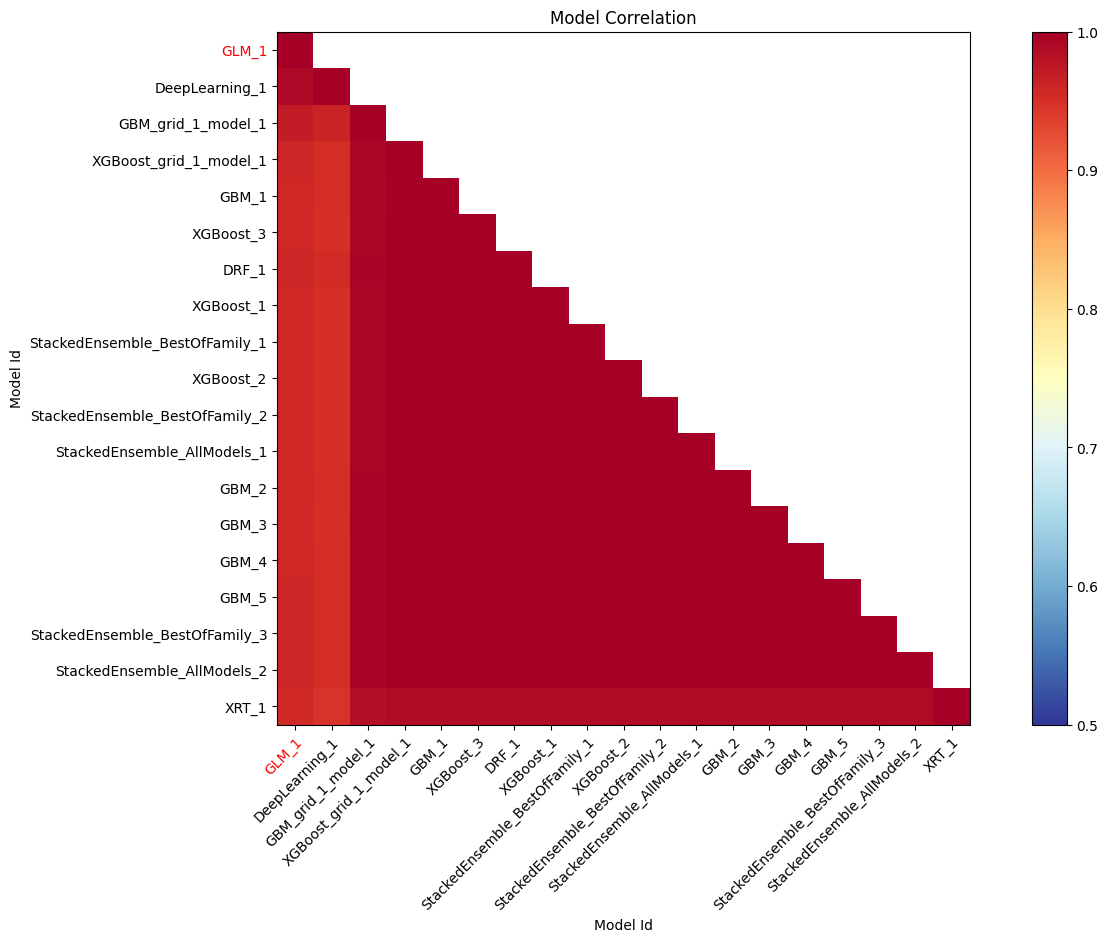

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

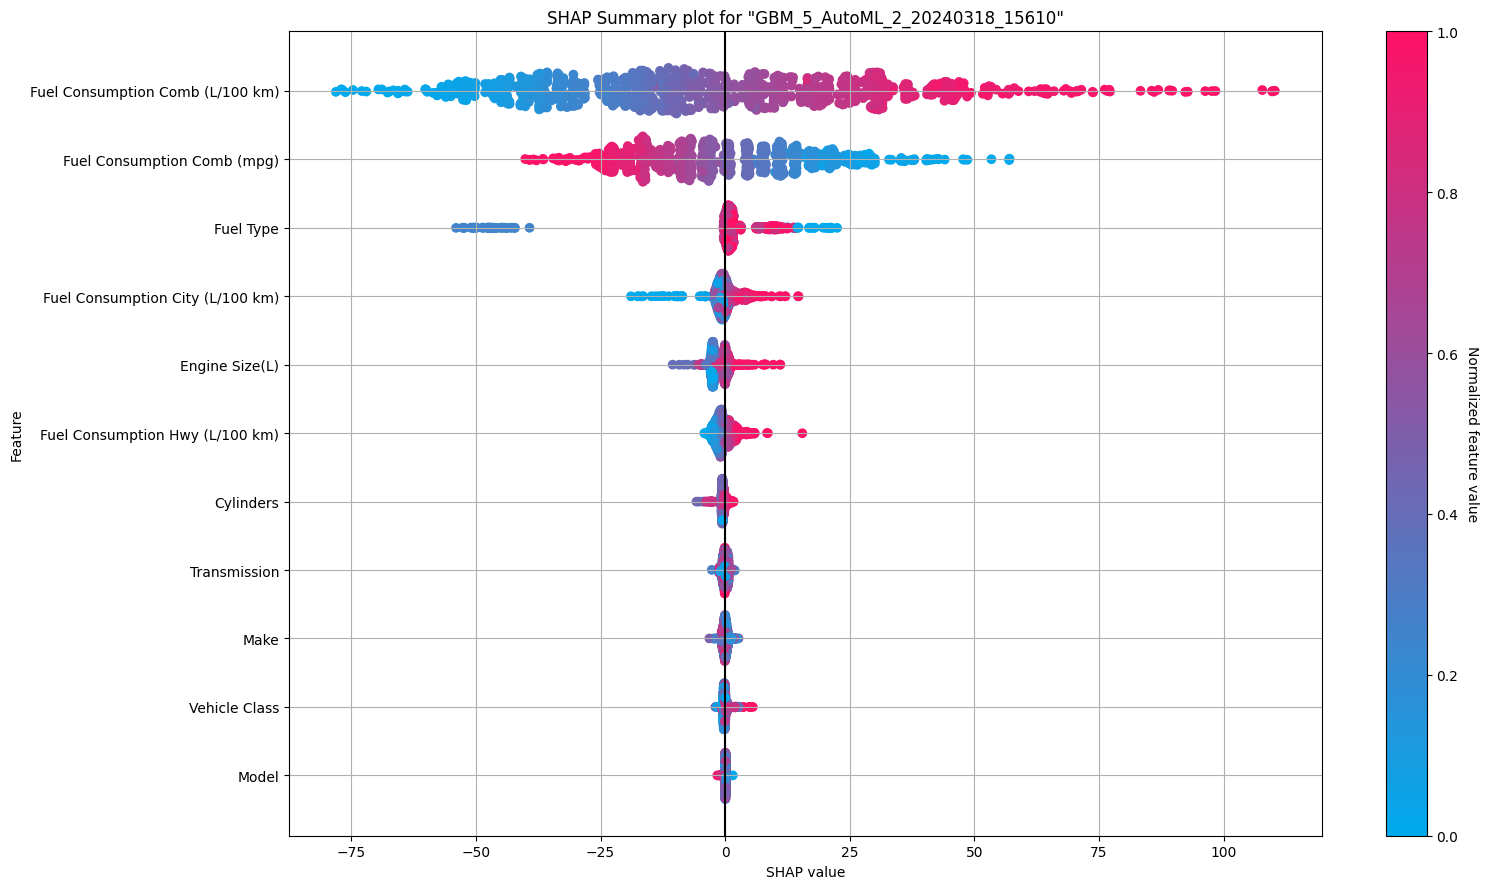

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

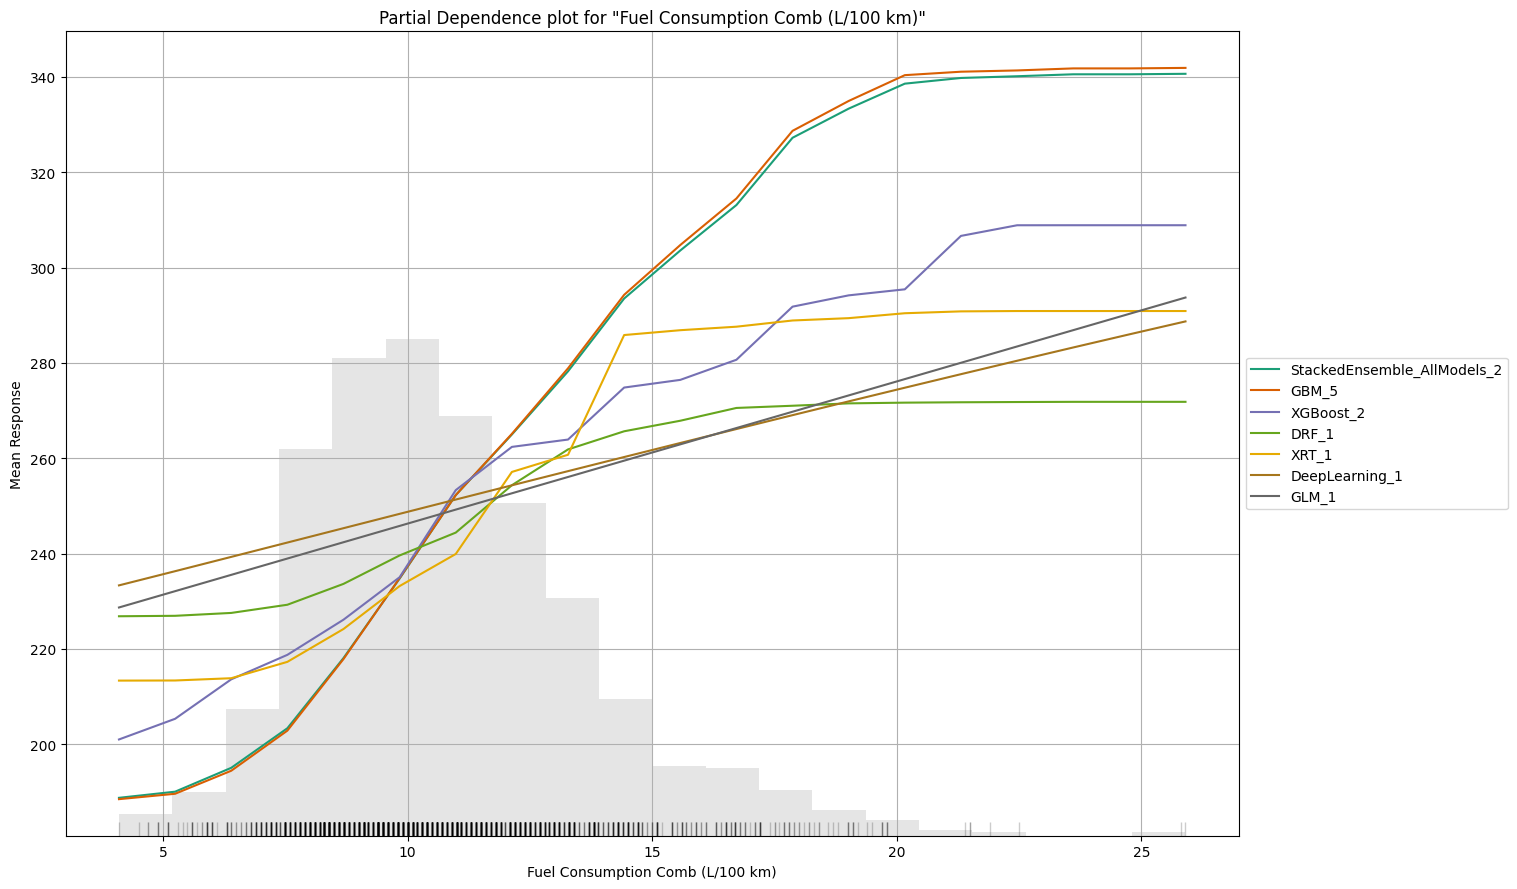

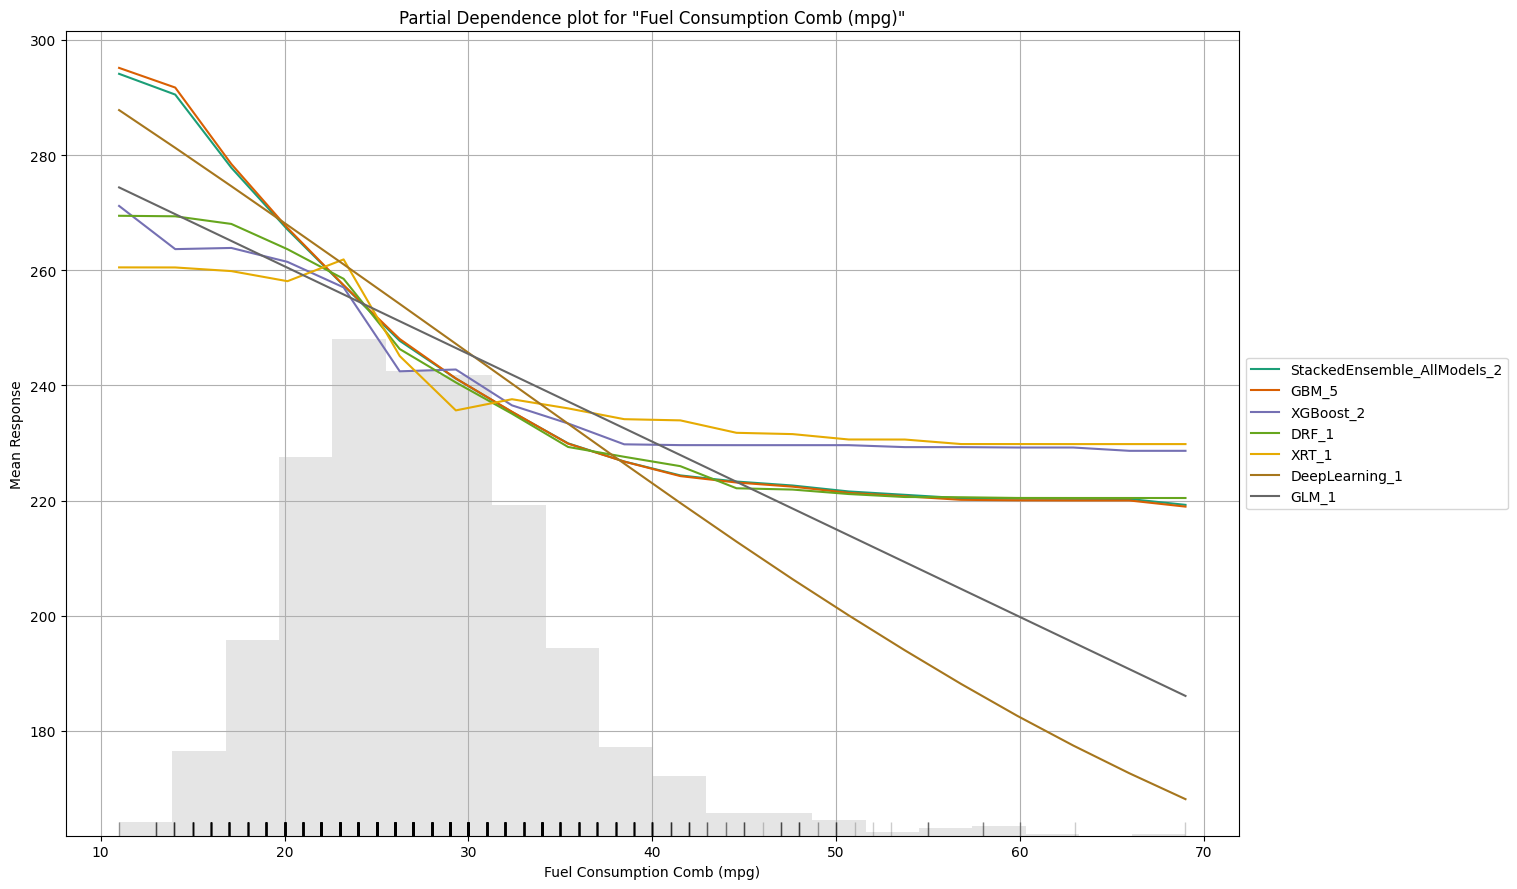

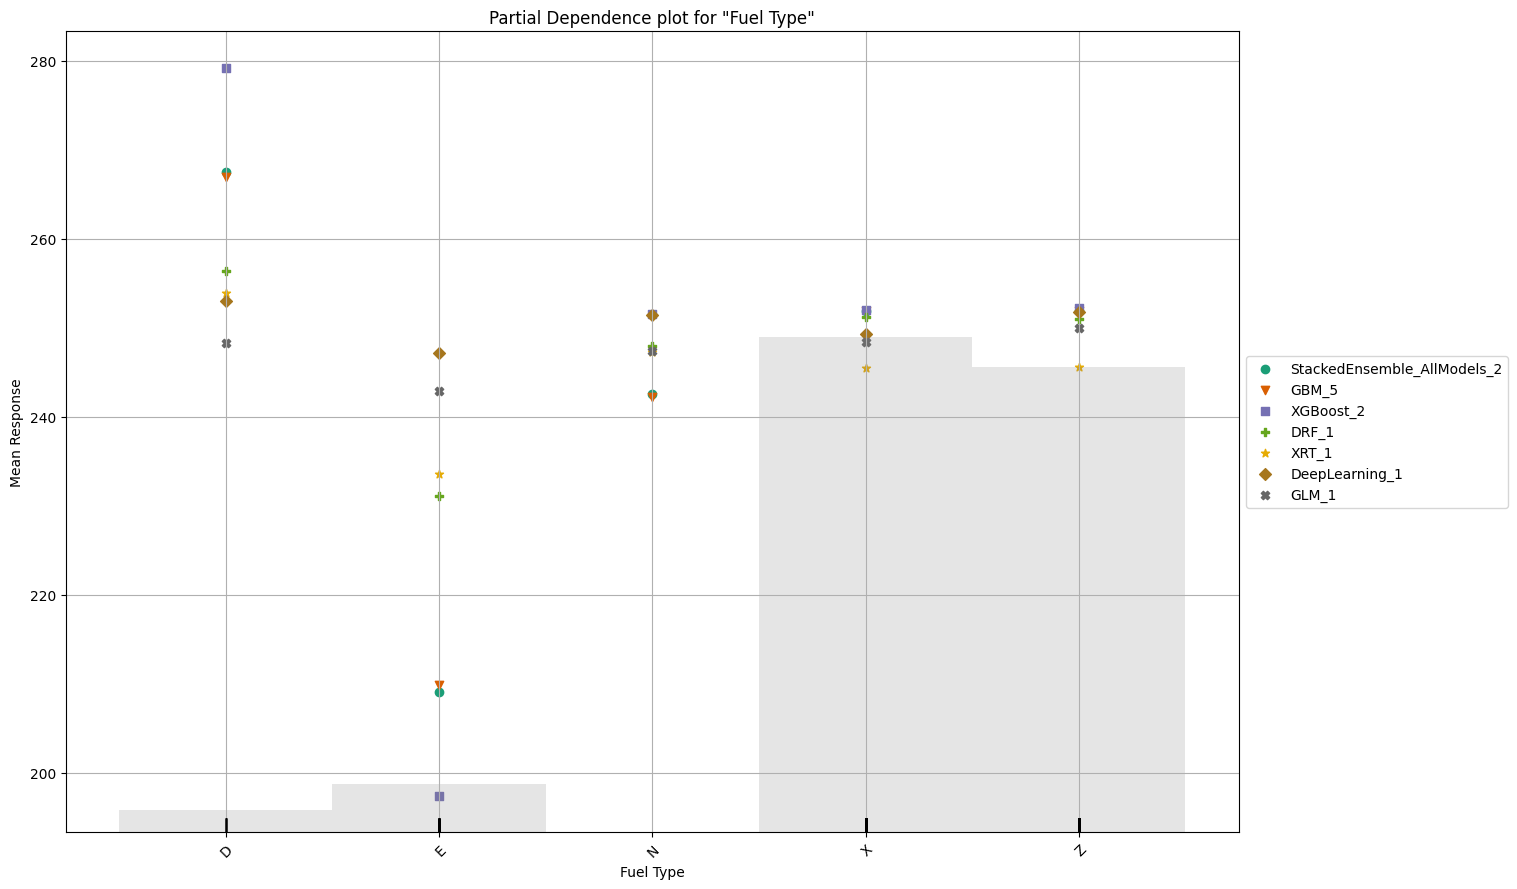

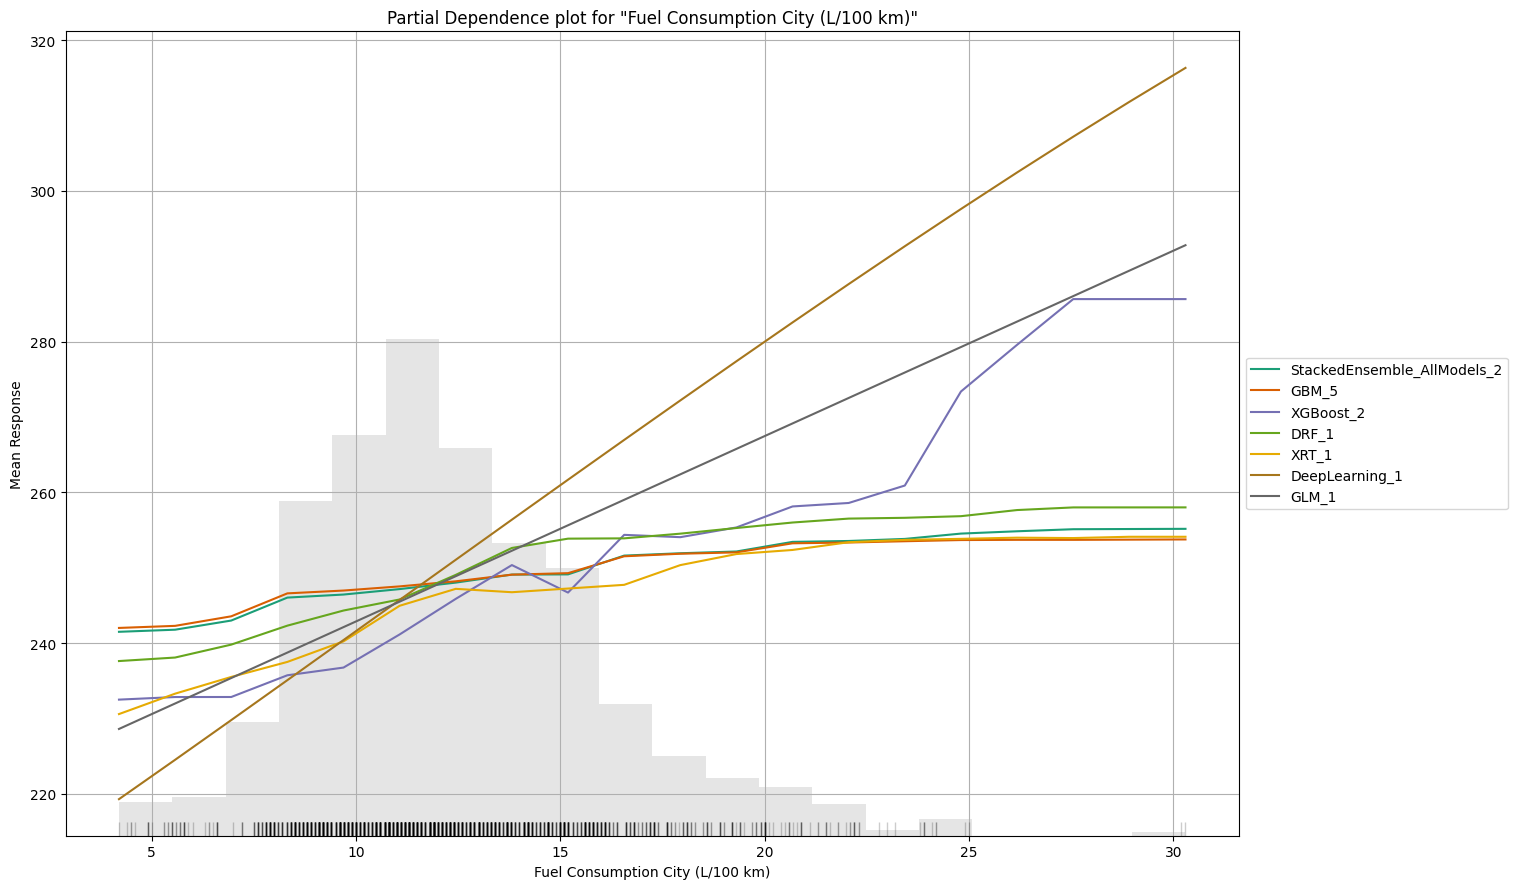

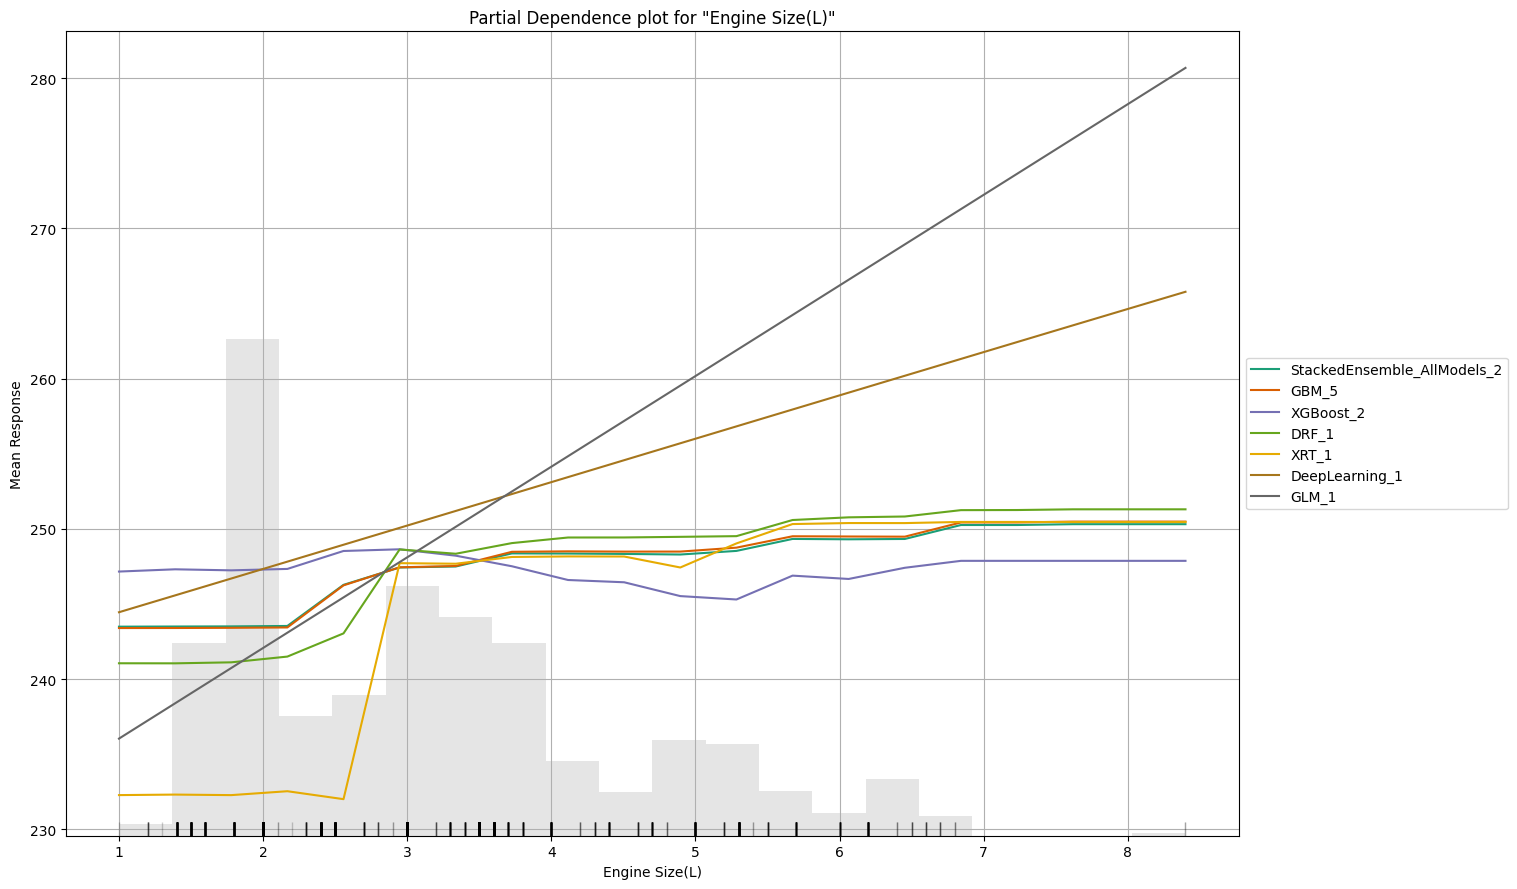

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

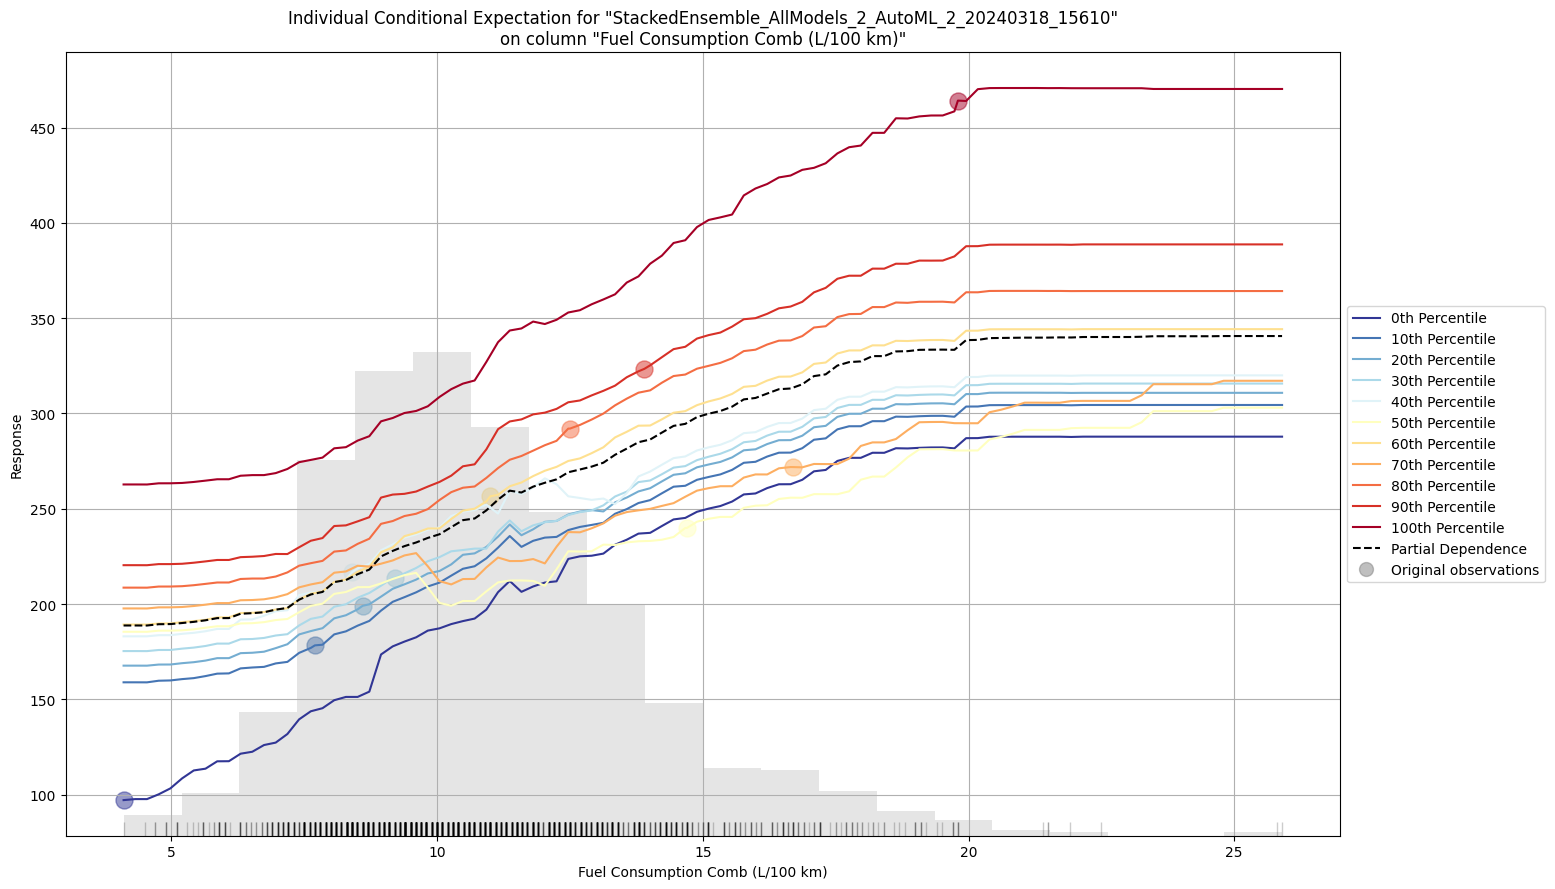

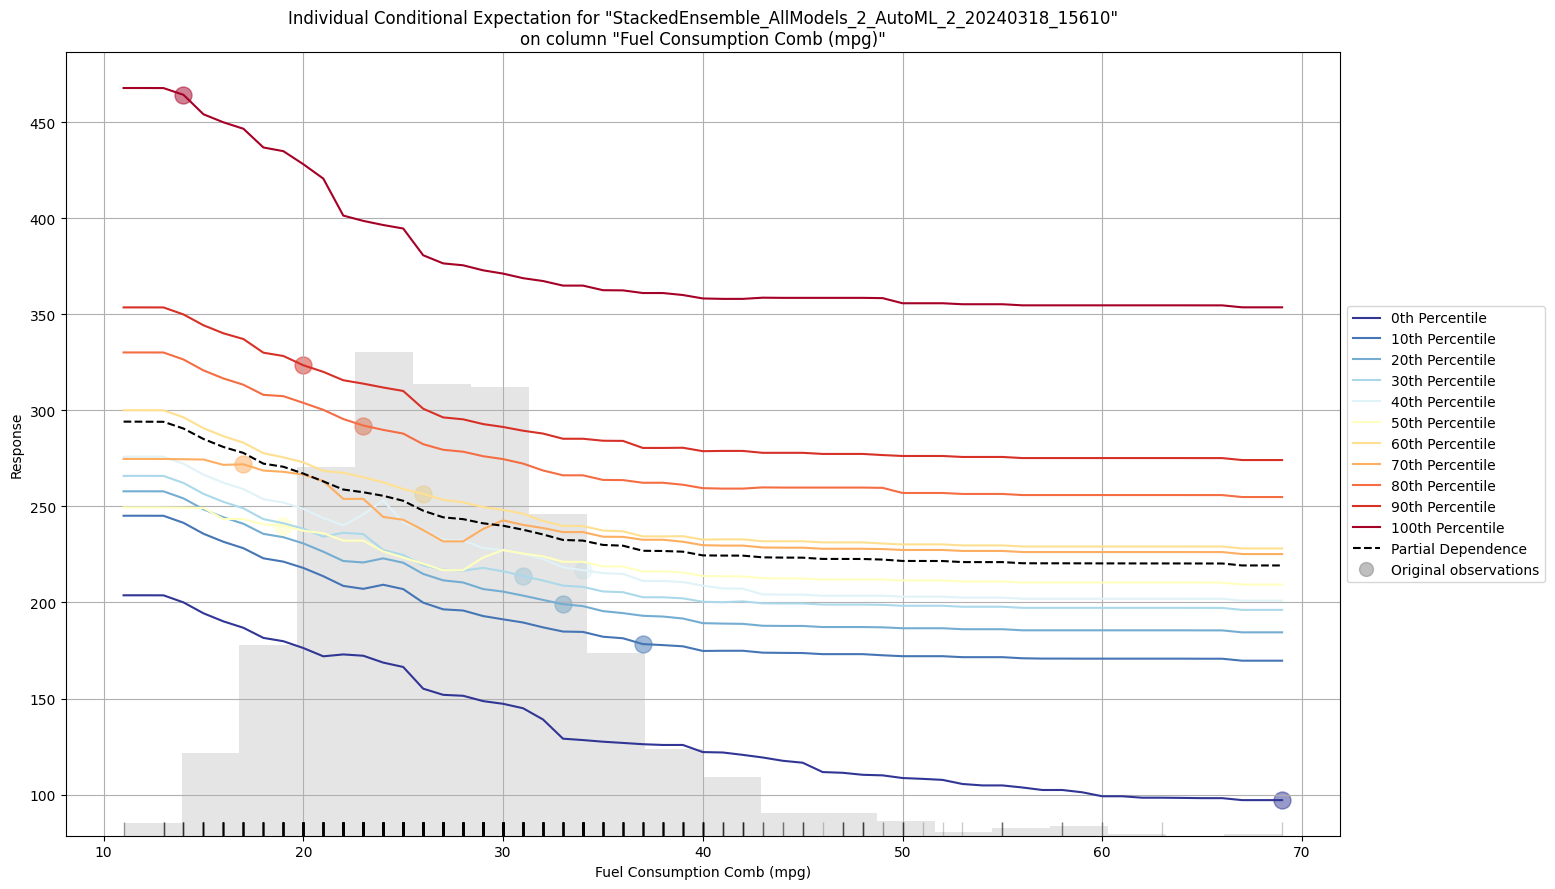

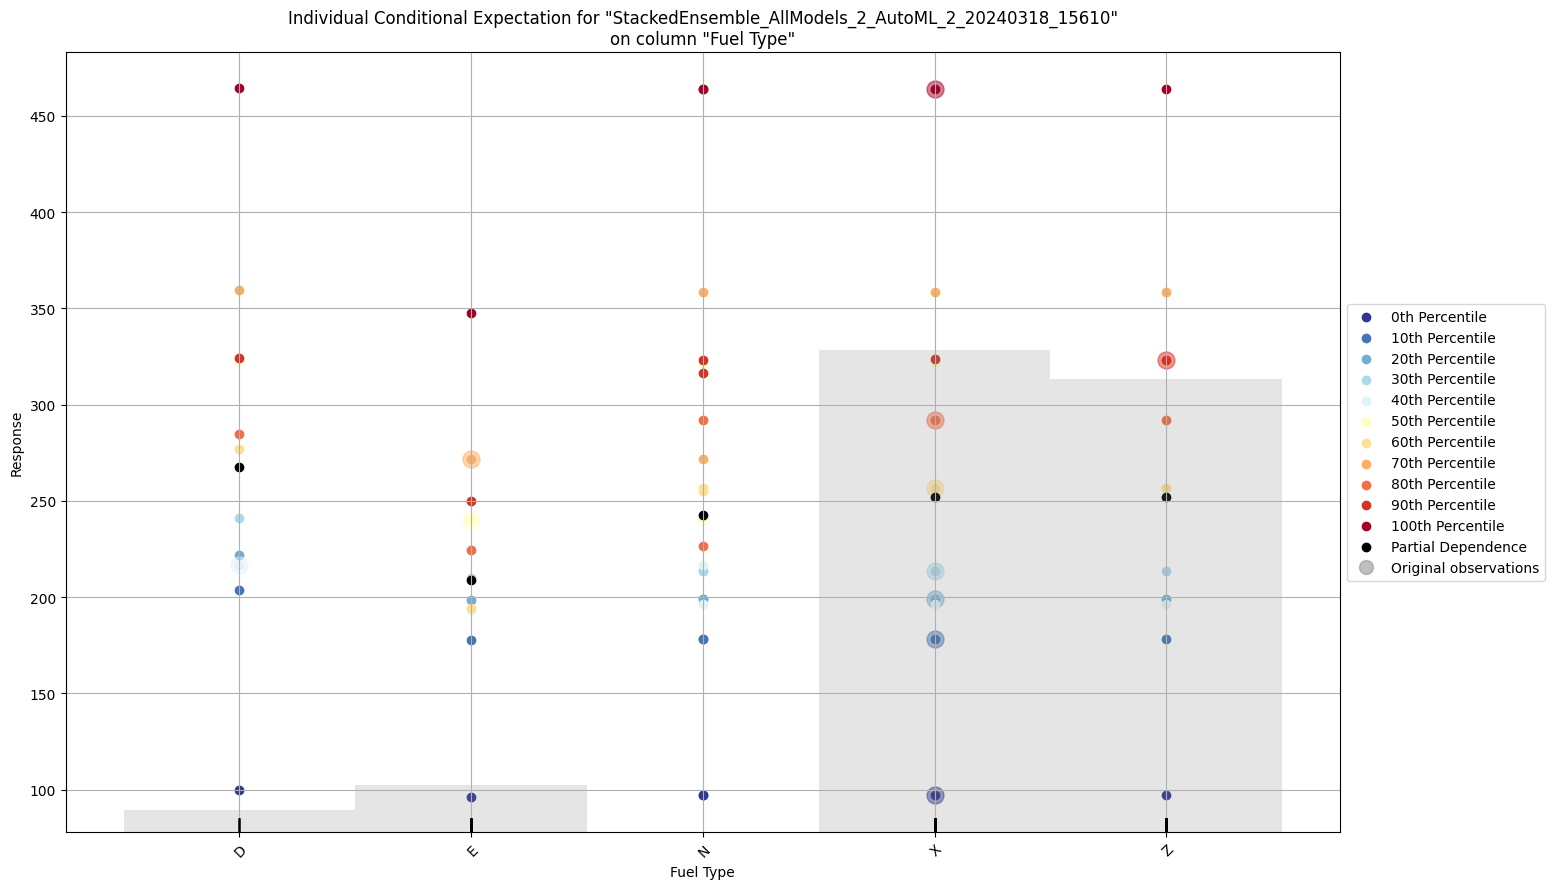

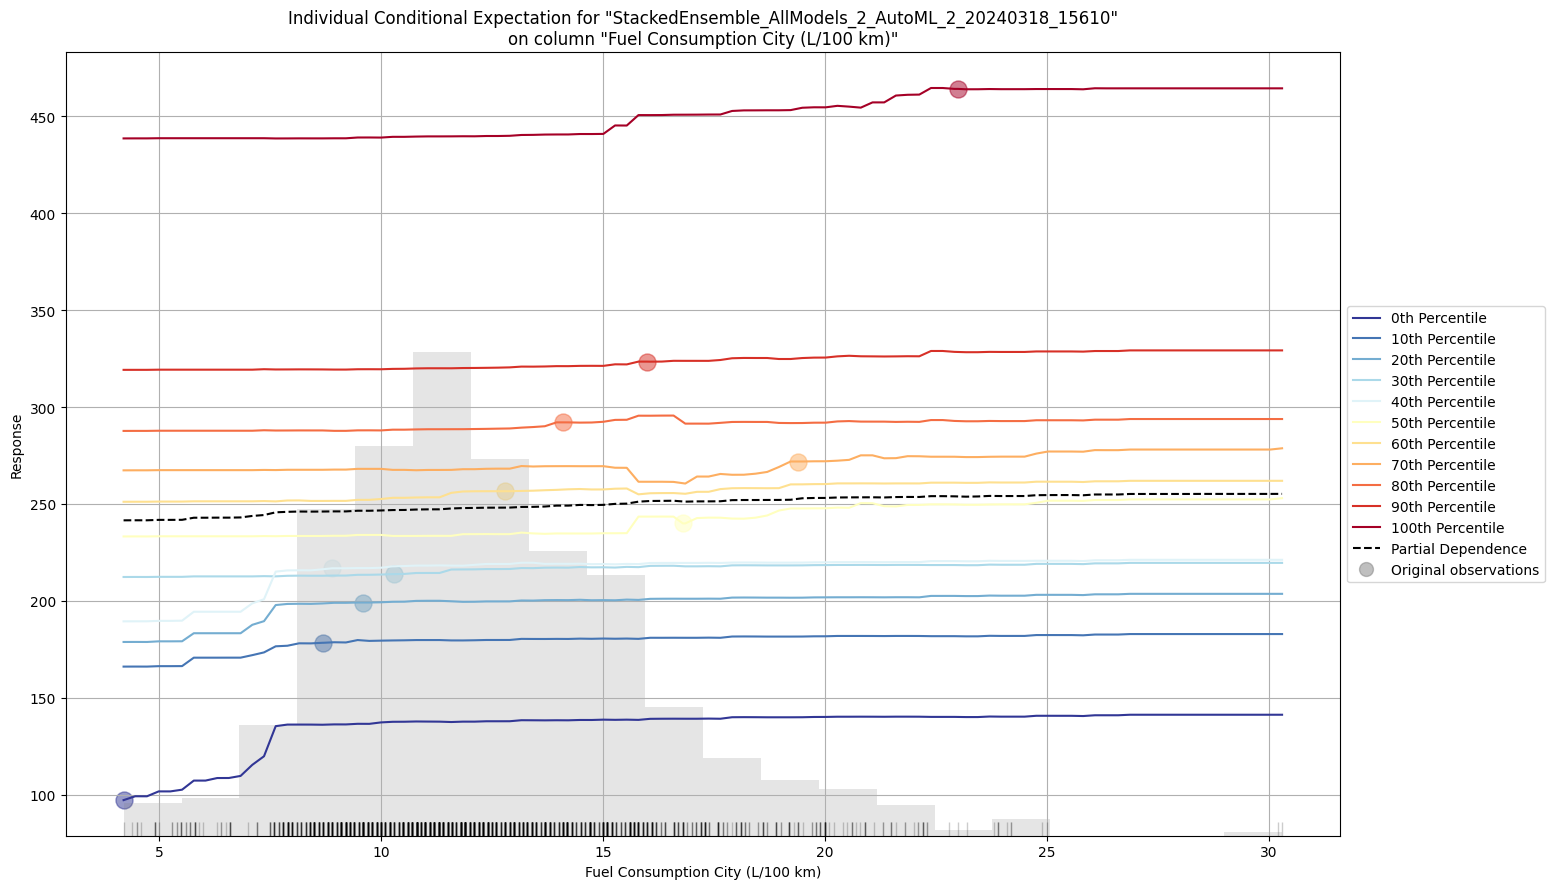

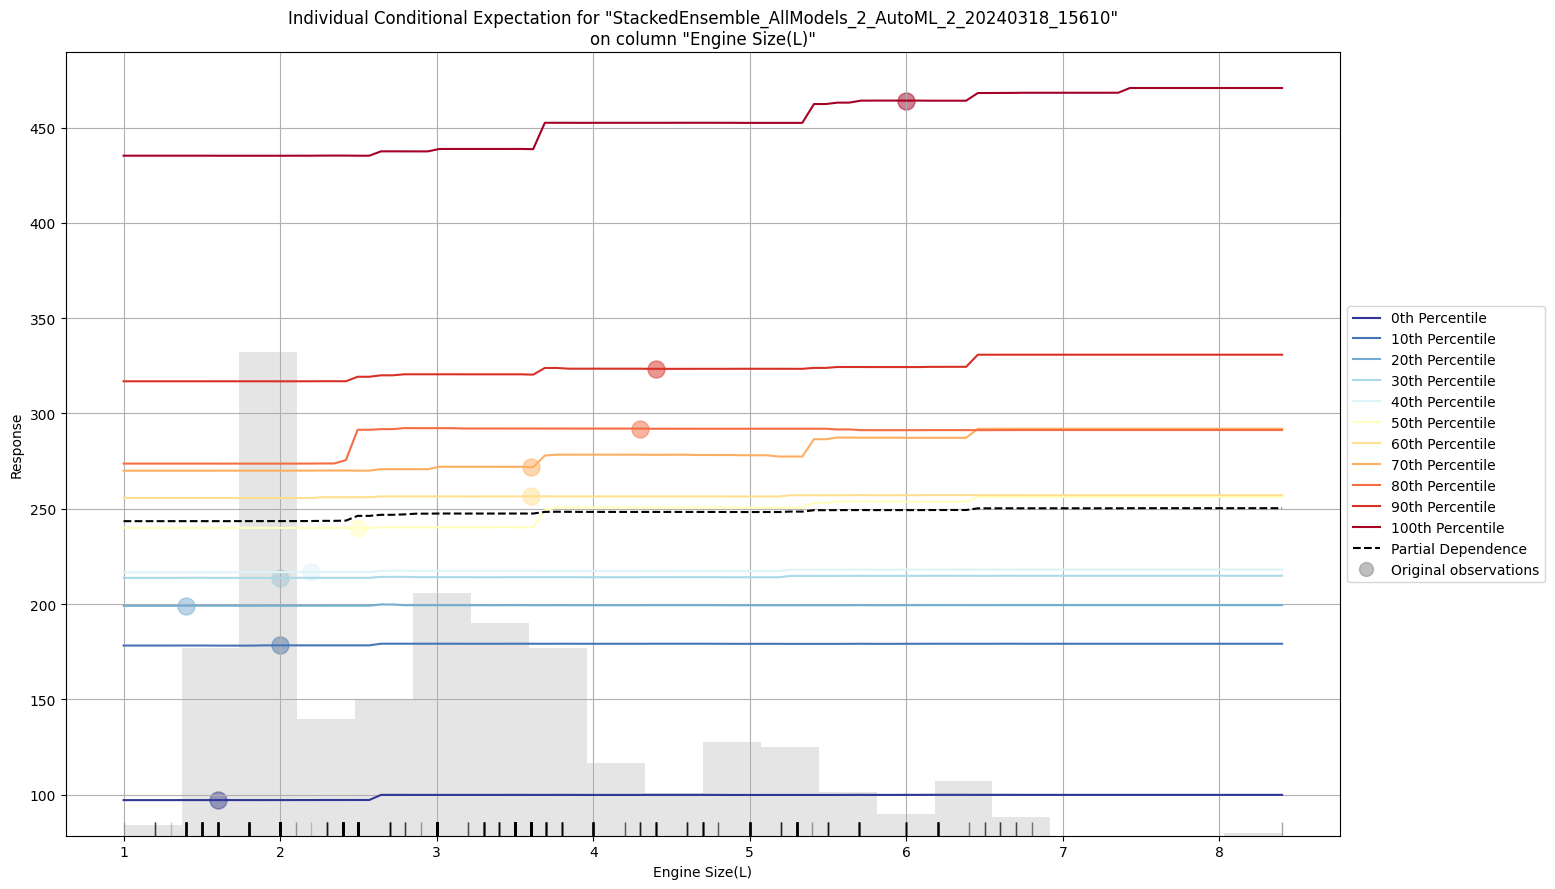

In [ ]:
exa = aml.explain(df_test)

**Inference**

**SHAP Summary**

- Fuel Consumption Features ( Hwy, City): These features are the most impactful on the model’s predictions, with higher consumption generally leading to higher predicted CO2 emissions.

- Fuel Consumption Comb (mpg): The combined fuel consumption in miles per gallon has a mix of positive and negative effects on the prediction.

- Fuel Type: There's a cluster of high-impact points at the bottom of the blue (low value) for fuel type indicating that certain fuel types are associated with lower CO2 emissions.

- Cylinders and Engine Size(L): Both have a high impact on the model’s output. Generally, a larger number of cylinders and a bigger engine size are associated with increased CO2 emissions, indicated by the distribution of dots extending to the right.

- Transmission and Vehicle Class: These features show a mix of positive and negative effects on the predictions, with a wide spread of SHAP values, indicating varying impacts.

- Make and Model: They less impact on the model's output compared to other features.

**Partial Dependency Plot**

- Mean response for different values of a feature means how the model's predictions change on average as that feature's values change, while all other features are held constant. .

- Gray bars at the bottom of the plot represent the distribution of the features in the dataset.

- The vertical length of the lines indicates the size of the confidence interval. A longer line suggests a larger interval and thus more uncertainty or variability in the predictions for that category of the feature.

- The dot in the middle of the interval represents the estimated mean response for that category of the feature when all other features in the model are held constant.

# **CONCLUSION**

**MODEL INTERPRETABILITY FROM ALL 3 MODELS**

Summary and comparison based on the calculated metrics:

**Linear Regression**
- Train MAE: 11.577
- Test MAE: 9.786

**Decision Tree**
- Train MAE: 0.518
- Test MAE: 1.327

**H2O AutoML (Stacked Ensemble)**
- Train MAE: 1.63
- Cross-Validation MAE: 2.02

**Performance Analysis**

- Accuracy:

 - The Decision Tree model has the lowest training MAE, suggesting it fits the training data well but, its test MAE is slightly higher than its training MAE, which indicates a very slight overfit but still shows good performance on unseen data.
 - The H2O AutoML model also shows strong performance, with a slightly higher train and cross-validation MAE.
 - Linear Regression has significantly higher MAE values, making it less accurate than the other two models for this dataset.

- Generalization:
  - The Decision Tree model generalizes well to unseen data, with a small difference between training and test MAE.
  - H2O AutoML also generalizes effectively, as indicated by its cross-validation MAE.
  - The Linear Regression model, while consistent between training and test errors, does not achieve as low an error rate as the other models, suggesting it does not capture the complexity of the dataset as effectively.

- Complexity and Interpretability:
  - Linear Regression is the simplest model and offers the highest interpretability but at the cost of performance.
  - Decision Tree offers a good balance between interpretability and performance, with the ability to understand feature importances.
  - H2O AutoML, particularly with stacked ensembles is less interpretable due to the complexity of combining multiple models, even though it provides mechanisms for understanding model predictions.

**Interpretability Analysis based on SHAP values**
- H20 SHAP analysis shows the most variation in feature impact, suggesting complex relationships and interactions. It could be considered highly interpretable because it provides a detailed picture of how different feature values affect the CO2 emissions.
- Decision Tree SHAP analysis has a more concentrated set of SHAP values for the most important feature, indicating a more consistent impact on predictions, which could make interpretation easier and more straightforward.
- Linear Regression SHAP analysis shows a balance between dispersion and concentration, indicating both consistent and variable impacts, offering a middle ground in terms of interpretability.

**FINAL DECISION?**

  **The Decision Tree model appears to be the best fit for the dataset, offering an significantly good balance between accuracy, generalization to unseen data and interpretability**. Its performance metrics indicate it captures the underlying patterns in the data well without significant overfitting. Also the SHAP analysis indicate that the best plot for interpretability that provides consistency and clarity is that of Decision Tree.


# **References**

1. https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html

2. https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

3. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/Model_Interpretability_Songs.ipynb

4. https://chat.openai.com/

5. https://www.youtube.com/watch?v=VY7SCl_DFho

6. https://www.youtube.com/watch?v=MQ6fFDwjuco

Dataset : https://www.kaggle.com/datasets/bhuviranga/co2-emissions

# **License**
MIT License

Copyright (c) 2024 vaishveerkumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.